## Load Test Data

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Get the file
downloaded = drive.CreateFile({'id':'1MyX9_PfBUz47dqplAPqztcjlKedi26C2'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data_.zip')

In [3]:
!mkdir checkpoint

mkdir: cannot create directory ‘checkpoint’: File exists


In [4]:
downloaded = drive.CreateFile({'id':'10PphrHSK-R4zZfN1tYKObb1DYUTtS5io'}) # replace the id with id of file you want to access
downloaded.GetContentFile('./checkpoint/ckpt.t7')

KeyboardInterrupt: ignored

In [0]:

# downloaded = drive.CreateFile({'id':'1ETlhcvUt1dI2y4XeZ8BCeOKZuJwTILhv'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('./checkpoint/test_stat.csv')

## Zip File Extraction

In [0]:
import zipfile
import os, os.path

In [0]:
DataPath = './data'

In [0]:
objZip = zipfile.ZipFile('./data_.zip')
objZip.extractall(DataPath)

In [0]:
from IPython.display import Image

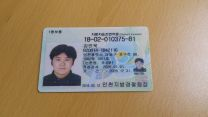

In [10]:
Image('./data/20180720_Small/20180720_000000.jpg')

## Install Pytorch 4.0

In [11]:
# torch 0.4 install for torch.no_grad()
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

# !pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
# !pip3 install torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5c1c6000 @  0x7f5a6d82a1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


## Region Data Load using pandas


In [0]:
data_root = "./data/"

In [0]:
import pandas as pd

In [0]:
train_data = pd.read_csv(data_root + 'Train.txt', sep="\t", header=None)

In [0]:
train_data.columns = ["filename", "LTx", "LTy", "RTx", "RTy","RBx", "RBy", "LBx", "LBy"]

In [9]:
train_data.head()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
0,./20180720_Small/20180720_000000.jpg,43,27,148,26,153,89,37,92
1,./20180720_Small/20180720_000001.jpg,43,27,148,26,153,92,37,92
2,./20180720_Small/20180720_000002.jpg,43,28,149,26,153,92,38,92
3,./20180720_Small/20180720_000004.jpg,43,28,148,26,154,92,37,92
4,./20180720_Small/20180720_000005.jpg,41,28,148,26,154,91,35,93


In [10]:
train_data.tail()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
8000,./20180723_3_Small/20180723_120938_006227.jpg,71,42,143,45,147,82,61,79
8001,./20180723_3_Small/20180723_120938_006230.jpg,65,41,137,43,140,80,57,76
8002,./20180723_3_Small/20180723_120938_006232.jpg,62,41,137,42,140,79,55,76
8003,./20180723_3_Small/20180723_120938_006235.jpg,63,41,136,43,139,80,55,76
8004,./20180723_3_Small/20180723_120938_006237.jpg,59,40,134,43,137,79,52,76


In [0]:
valid_data = pd.read_csv(data_root + 'Valid.txt', sep="\t", header=None)

In [0]:
valid_data.columns = ["filename", "LTx", "LTy", "RTx", "RTy","RBx", "RBy", "LBx", "LBy"]

In [13]:
valid_data.head()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
0,./20180720_Small/20180720_000003.jpg,43,28,148,26,153,92,38,92
1,./20180720_Small/20180720_000007.jpg,44,28,149,26,154,93,38,95
2,./20180720_Small/20180720_000009.jpg,44,28,148,26,154,92,39,92
3,./20180720_Small/20180720_000010.jpg,44,27,149,25,154,89,38,92
4,./20180720_Small/20180720_000012.jpg,42,27,149,25,154,89,36,92


In [14]:
valid_data.tail()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
2995,./20180723_3_Small/20180723_120938_006229.jpg,67,41,139,44,142,80,58,77
2996,./20180723_3_Small/20180723_120938_006231.jpg,62,40,137,43,140,79,55,76
2997,./20180723_3_Small/20180723_120938_006233.jpg,63,41,136,42,138,79,55,77
2998,./20180723_3_Small/20180723_120938_006234.jpg,63,42,136,43,138,80,55,76
2999,./20180723_3_Small/20180723_120938_006236.jpg,61,41,134,42,137,79,54,77


## Image Load using PILOW

In [0]:
from PIL import Image

def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')


def accimage_loader(path):
    import accimage
    try:
        return accimage.Image(path)
    except IOError:
        # Potentially a decoding problem, fall back to PIL.Image
        return pil_loader(path)


def default_loader(path):
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader(path)
    else:
        return pil_loader(path)

In [0]:
image = default_loader(data_root+train_data['filename'][0])

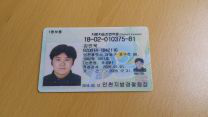

In [17]:
image

## PreProcess Image Data

In [0]:
import numpy as np
import torch

import collections

try:
    import accimage
except ImportError:
    accimage = None
    
def _is_pil_image(img):
    if accimage is not None:
        return isinstance(img, (Image.Image, accimage.Image))
    else:
        return isinstance(img, Image.Image)


def _is_tensor_image(img):
    return torch.is_tensor(img) and img.ndimension() == 3


def _is_numpy_image(img):
    return isinstance(img, np.ndarray) and (img.ndim in {2, 3})

def to_tensor(pic):
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    See ``ToTensor`` for more details.
    Args:
        pic (PIL Image or numpy.ndarray): Image to be converted to tensor.
    Returns:
        Tensor: Converted image.
    """
    if not(_is_pil_image(pic) or _is_numpy_image(pic)):
        raise TypeError('pic should be PIL Image or ndarray. Got {}'.format(type(pic)))

    if isinstance(pic, np.ndarray):
        # handle numpy array
        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        # backward compatibility
        if isinstance(img, torch.ByteTensor):
            return img.float().div(255)
        else:
            return img

    if accimage is not None and isinstance(pic, accimage.Image):
        nppic = np.zeros([pic.channels, pic.height, pic.width], dtype=np.float32)
        pic.copyto(nppic)
        return torch.from_numpy(nppic)

    # handle PIL Image
    if pic.mode == 'I':
        img = torch.from_numpy(np.array(pic, np.int32, copy=False))
    elif pic.mode == 'I;16':
        img = torch.from_numpy(np.array(pic, np.int16, copy=False))
    elif pic.mode == 'F':
        img = torch.from_numpy(np.array(pic, np.float32, copy=False))
    elif pic.mode == '1':
        img = 255 * torch.from_numpy(np.array(pic, np.uint8, copy=False))
    else:
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
    # PIL image mode: L, P, I, F, RGB, YCbCr, RGBA, CMYK
    if pic.mode == 'YCbCr':
        nchannel = 3
    elif pic.mode == 'I;16':
        nchannel = 1
    else:
        nchannel = len(pic.mode)
    img = img.view(pic.size[1], pic.size[0], nchannel)
    # put it from HWC to CHW format
    # yikes, this transpose takes 80% of the loading time/CPU
    img = img.transpose(0, 1).transpose(0, 2).contiguous()
    if isinstance(img, torch.ByteTensor):
        return img.float().div(255)
    else:
        return img

In [0]:
image_tensor = to_tensor(image)

In [20]:
image_tensor.type()

'torch.FloatTensor'

In [21]:
image_tensor.size()

torch.Size([3, 117, 208])

## Design Dataset

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

In [0]:
resize_ratio = 100 / 100

In [0]:
class AutoCropDataSet(Dataset):
    
    def __init__(self, data):
        self.input_data = []
        self.target_data = []
        
        # Load All Data
        print("image data loading...")
        for index, row in data.iterrows():
            filename = data_root + row['filename']
            image = default_loader(filename)
            image_tensor = to_tensor(image)
            self.input_data.append(image_tensor)
             
            target_tensor = torch.tensor([[ float(row['LTx']*resize_ratio), float(row['LTy']*resize_ratio), float(row['RTx']*resize_ratio), float(row['RTy']*resize_ratio),  
                                            float(row['RBx']*resize_ratio), float(row['RBy']*resize_ratio), float(row['LBx']*resize_ratio), float(row['LBy']*resize_ratio) ]])             
            self.target_data.append(target_tensor)
        
        print("[{}] data is loaded!".format(len(self.input_data)))
        
    def __getitem__(self, index):
        return self.input_data[index], self.target_data[index]
                                          
    def __len__(self):
        return len(self.input_data)

In [25]:
train_dataset = AutoCropDataSet(train_data)
train_loader = DataLoader(dataset=train_dataset, batch_size=20, shuffle=True)

image data loading...
[8005] data is loaded!


In [26]:
valid_dataset = AutoCropDataSet(valid_data)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=20, shuffle=True)

image data loading...
[3000] data is loaded!


## Design Model

In [0]:
import numpy as np
import torch
import torch.nn.functional as F

In [0]:
class InceptionA(torch.nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        
        self.branch_pool = torch.nn.Conv2d(in_channels, 24, kernel_size=1)
        self.branch1x1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        
        self.branch5x5_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = torch.nn.Conv2d(16, 24, kernel_size=5, padding=2)
        
        self.branch3x3_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3_2 = torch.nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3_3 = torch.nn.Conv2d(24, 24, kernel_size=3, padding=1)
    
    def forward(self, x):
        
        # print("x = ", x.size())
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        # print("branch_pool = ", branch_pool.size())
        
        
        branch1x1 = self.branch1x1(x)
        # print("branch1x1 = ", branch1x1.size())
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        # print("branch5x5 = ", branch5x5.size())
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        # print("branch3x3 = ", branch3x3.size())
        
        outputs = [branch_pool, branch1x1, branch5x5, branch3x3]
       
        ret_value = torch.cat(outputs, 1)
        
        # print("ret_value = ", ret_value.size())
        
        return ret_value

In [0]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        ## 3 = rgb 3 channel
        self.conv1 = torch.nn.Conv2d( 3, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(88, 20, kernel_size=5)
        
        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)
        
        self.mp = torch.nn.MaxPool2d(2)
        self.fc1 = torch.nn.Linear(112112, 500)
        self.fc2 = torch.nn.Linear(500, 500)
        self.fc3 = torch.nn.Linear(500, 500)
        self.fcL = torch.nn.Linear(500, 8)
        # self.fc = torch.nn.Linear(112112, 8)
        
    def forward(self, x):
        in_size = x.size(0)
        
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fcL(x)
        
        return x # F.log_softmax(x)

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [0]:
model = Model()
model = model.to(device)

In [0]:
import pandas as pd
import os, os.path

#@title Resume 여부
resume = False #@param {type:"boolean"}

# 그래프를 위하여 pandas에 accuracy와 loss를 저장한다.
train_acc_collect = []
valid_acc_collect = []

train_loss_collect = []
valid_loss_collect = []

if resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.t7')
    model.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']
    best_epoch = start_epoch
    print('==> best_epoch : ', best_epoch)
    print('==> best_acc : ', best_acc)
    
    ## Load Train Stat
    # train_stat = pd.read_csv("./checkpoint/test_stat.csv")
    # train_acc_collect = train_stat['TrainAccRate'].tolist()
    # valid_acc_collect = train_stat['ValidAccRate'].tolist()
    # train_loss_collect = train_stat['TrainLoss'].tolist()
    # valid_loss_collect = train_stat['ValidLoss'].tolist()
    
    print('==> Done..')
else:
    # train_stat = pd.DataFrame()
    start_epoch = 0
    best_acc = 0
    best_epoch = 0
    

## Define criterion & optimizer

In [0]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-5 )

## Training

In [0]:
def calc_correct(pred, answer, sub_th): 
  
  mse = abs(pred - answer) 
  #print(mse)
  mse2 = torch.zeros([pred.size()[0], 4], dtype=torch.float32)
    
  for i in range(0, 4):
    mse2[:,i] = mse[:,2*i]+mse[:,2*i+1]
    
  # print(mse2)
  
  # 4점의 정답과의 거리의 차가 sub_th 이내인 데이터의 개수
  sum_correct =  ((mse2 < sub_th).sum(1) == 4 ).sum()
  
  return sum_correct

# calc_correct(a, b, 10.0)

In [0]:
def train(epoch):
    model.train()
    
    correct = 0.0
    total = 0.0
    
    total_loss = 0.0
    train_loss = 0
    
    for batch_idx, (data, target) in  enumerate(train_loader):
    
        data, target = data.to(device), target.to(device)
        
        # init optimizer
        optimizer.zero_grad()

        # Go Forward
        target_pred = model(data)

        # Calc loss
        target = target.view(-1, 8)
        loss = criterion(target_pred, target)

        # Calc Acc (loss < 10.0)      
        correct += calc_correct(target_pred, target, 3)
        # correct += ((abs(target_pred - target)<3.0).sum(1)==8.0).sum()
        # correct += (abs(target_pred - target).sum(1)<10.0).sum()
        correct = (float)(correct.item())
        total  += len(target)
          
        # loss backward
        loss.backward()

        # update weight
        optimizer.step()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} ({:.0f}/{:.0f})'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), correct, total))
        
        total_loss += loss.item()
    print("")
    print(epoch, total_loss)
    print("")
    
    # Save checkpoint.
    acc = 100.0*(correct)/(total)
    print("acc = ", acc)
      
    # Save Train Statistics
    epoch_acc = correct/total
    epoch_loss = total_loss/(batch_idx+1)
    train_acc_collect.append(epoch_acc)
    train_loss_collect.append(epoch_loss)

In [0]:
def test(epoch):
    
    global best_acc
    global best_epoch
    
    correct = 0.0
    total = 0.0
    
    with torch.no_grad():

      model.eval()

      total_loss = 0.0
      for batch_idx, (data, target) in  enumerate(valid_loader):

          data, target = data.to(device), target.to(device)

          # init optimizer
          # optimizer.zero_grad()

          # Go Forward
          target_pred = model(data)

          # Calc loss
          target = target.view(-1, 8)
          loss = criterion(target_pred, target)
          
          # Calc Acc (loss < 10.0)
          correct += calc_correct(target_pred, target, 3)
          # correct += ((abs(target_pred - target)<2.0).sum(1)==8.0).sum()
          #correct += (abs(target_pred - target).sum(1)<10.0).sum()
          correct = (float)(correct.item())
          total  += len(target)

          if batch_idx % 10 == 0:
              print('Test Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} ({:.0f}/{:.0f})'.format(
                  epoch, batch_idx * len(data), len(valid_loader.dataset),
                  100. * batch_idx / len(valid_loader), loss.item(), correct, total))

          total_loss += loss.item()
      print("")
      print(epoch, total_loss)
      print("")
      
    
      # Save checkpoint.
      acc = 100.0*(correct)/(total)
      print("acc = ", acc)
      if acc > best_acc:
          print('\nSaving.. = [%d, %.3f]\n'% (epoch, acc))
          state = {
              'net': model.state_dict(),
              'acc': acc,
              'epoch': epoch,
          }
          if not os.path.isdir('checkpoint'):
              os.mkdir('checkpoint')
          torch.save(state, './checkpoint/ckpt.t7')
          best_acc = acc
          best_epoch = epoch
      
      
      # Save Eval Statistics
      epoch_acc = correct/total
      epoch_loss = total_loss/(batch_idx+1)
      valid_acc_collect.append(epoch_acc)
      valid_loss_collect.append(epoch_loss)

In [90]:
for epoch in range(start_epoch, start_epoch+100):
    train(epoch)
    test(epoch)
    start_epoch = epoch
    


Train Epoch: 279 [0/8005 (0%)]	Loss: 63.651100 (20/20)
Train Epoch: 279 [200/8005 (2%)]	Loss: 76.943207 (214/220)
Train Epoch: 279 [400/8005 (5%)]	Loss: 50.798134 (408/420)
Train Epoch: 279 [600/8005 (7%)]	Loss: 29.776527 (603/620)
Train Epoch: 279 [800/8005 (10%)]	Loss: 50.460075 (800/820)
Train Epoch: 279 [1000/8005 (12%)]	Loss: 54.982033 (996/1020)
Train Epoch: 279 [1200/8005 (15%)]	Loss: 43.021683 (1193/1220)
Train Epoch: 279 [1400/8005 (17%)]	Loss: 61.228104 (1387/1420)
Train Epoch: 279 [1600/8005 (20%)]	Loss: 42.124756 (1584/1620)
Train Epoch: 279 [1800/8005 (22%)]	Loss: 66.399925 (1781/1820)
Train Epoch: 279 [2000/8005 (25%)]	Loss: 51.479897 (1975/2020)
Train Epoch: 279 [2200/8005 (27%)]	Loss: 42.924675 (2171/2220)
Train Epoch: 279 [2400/8005 (30%)]	Loss: 41.062698 (2365/2420)
Train Epoch: 279 [2600/8005 (32%)]	Loss: 52.077751 (2560/2620)
Train Epoch: 279 [2800/8005 (35%)]	Loss: 51.846611 (2754/2820)
Train Epoch: 279 [3000/8005 (37%)]	Loss: 60.505104 (2953/3020)
Train Epoch: 279


279 36709.59538269043

acc =  85.26666666666667
Train Epoch: 280 [0/8005 (0%)]	Loss: 29.908091 (20/20)
Train Epoch: 280 [200/8005 (2%)]	Loss: 48.683250 (219/220)
Train Epoch: 280 [400/8005 (5%)]	Loss: 50.967178 (415/420)
Train Epoch: 280 [600/8005 (7%)]	Loss: 60.337795 (610/620)
Train Epoch: 280 [800/8005 (10%)]	Loss: 29.289467 (806/820)
Train Epoch: 280 [1000/8005 (12%)]	Loss: 54.723572 (999/1020)
Train Epoch: 280 [1200/8005 (15%)]	Loss: 75.059471 (1194/1220)
Train Epoch: 280 [1400/8005 (17%)]	Loss: 38.290306 (1389/1420)
Train Epoch: 280 [1600/8005 (20%)]	Loss: 61.843105 (1583/1620)
Train Epoch: 280 [1800/8005 (22%)]	Loss: 43.459625 (1782/1820)
Train Epoch: 280 [2000/8005 (25%)]	Loss: 50.286015 (1980/2020)
Train Epoch: 280 [2200/8005 (27%)]	Loss: 33.059975 (2177/2220)
Train Epoch: 280 [2400/8005 (30%)]	Loss: 39.424309 (2371/2420)
Train Epoch: 280 [2600/8005 (32%)]	Loss: 31.536921 (2569/2620)
Train Epoch: 280 [2800/8005 (35%)]	Loss: 39.219780 (2766/2820)
Train Epoch: 280 [3000/8005 (3


280 37036.562072753906

acc =  85.33333333333333
Train Epoch: 281 [0/8005 (0%)]	Loss: 54.592148 (20/20)
Train Epoch: 281 [200/8005 (2%)]	Loss: 75.439590 (218/220)
Train Epoch: 281 [400/8005 (5%)]	Loss: 32.737175 (414/420)
Train Epoch: 281 [600/8005 (7%)]	Loss: 47.506325 (613/620)
Train Epoch: 281 [800/8005 (10%)]	Loss: 29.513834 (811/820)
Train Epoch: 281 [1000/8005 (12%)]	Loss: 50.565071 (1008/1020)
Train Epoch: 281 [1200/8005 (15%)]	Loss: 40.619232 (1203/1220)
Train Epoch: 281 [1400/8005 (17%)]	Loss: 52.833305 (1400/1420)
Train Epoch: 281 [1600/8005 (20%)]	Loss: 49.675011 (1594/1620)
Train Epoch: 281 [1800/8005 (22%)]	Loss: 37.303986 (1794/1820)
Train Epoch: 281 [2000/8005 (25%)]	Loss: 35.159821 (1992/2020)
Train Epoch: 281 [2200/8005 (27%)]	Loss: 42.601509 (2188/2220)
Train Epoch: 281 [2400/8005 (30%)]	Loss: 150.464340 (2383/2420)
Train Epoch: 281 [2600/8005 (32%)]	Loss: 28.735649 (2577/2620)
Train Epoch: 281 [2800/8005 (35%)]	Loss: 25.420010 (2775/2820)
Train Epoch: 281 [3000/8005


281 36186.133319854736

acc =  86.16666666666667
Train Epoch: 282 [0/8005 (0%)]	Loss: 64.555023 (18/20)
Train Epoch: 282 [200/8005 (2%)]	Loss: 53.641617 (217/220)
Train Epoch: 282 [400/8005 (5%)]	Loss: 33.392395 (409/420)
Train Epoch: 282 [600/8005 (7%)]	Loss: 63.035339 (606/620)
Train Epoch: 282 [800/8005 (10%)]	Loss: 41.212280 (800/820)
Train Epoch: 282 [1000/8005 (12%)]	Loss: 45.078590 (996/1020)
Train Epoch: 282 [1200/8005 (15%)]	Loss: 45.711800 (1193/1220)
Train Epoch: 282 [1400/8005 (17%)]	Loss: 38.275528 (1390/1420)
Train Epoch: 282 [1600/8005 (20%)]	Loss: 35.522728 (1585/1620)
Train Epoch: 282 [1800/8005 (22%)]	Loss: 43.511436 (1782/1820)
Train Epoch: 282 [2000/8005 (25%)]	Loss: 50.342926 (1977/2020)
Train Epoch: 282 [2200/8005 (27%)]	Loss: 40.380566 (2174/2220)
Train Epoch: 282 [2400/8005 (30%)]	Loss: 29.605263 (2371/2420)
Train Epoch: 282 [2600/8005 (32%)]	Loss: 36.504654 (2567/2620)
Train Epoch: 282 [2800/8005 (35%)]	Loss: 57.538467 (2765/2820)
Train Epoch: 282 [3000/8005 (


282 36768.803356170654

acc =  86.0
Train Epoch: 283 [0/8005 (0%)]	Loss: 37.705132 (20/20)
Train Epoch: 283 [200/8005 (2%)]	Loss: 56.625122 (216/220)
Train Epoch: 283 [400/8005 (5%)]	Loss: 27.742680 (414/420)
Train Epoch: 283 [600/8005 (7%)]	Loss: 44.103832 (610/620)
Train Epoch: 283 [800/8005 (10%)]	Loss: 46.565166 (807/820)
Train Epoch: 283 [1000/8005 (12%)]	Loss: 45.964645 (1002/1020)
Train Epoch: 283 [1200/8005 (15%)]	Loss: 27.977985 (1198/1220)
Train Epoch: 283 [1400/8005 (17%)]	Loss: 47.602600 (1391/1420)
Train Epoch: 283 [1600/8005 (20%)]	Loss: 46.186649 (1590/1620)
Train Epoch: 283 [1800/8005 (22%)]	Loss: 56.871006 (1786/1820)
Train Epoch: 283 [2000/8005 (25%)]	Loss: 60.546196 (1983/2020)
Train Epoch: 283 [2200/8005 (27%)]	Loss: 54.279694 (2177/2220)
Train Epoch: 283 [2400/8005 (30%)]	Loss: 45.777794 (2374/2420)
Train Epoch: 283 [2600/8005 (32%)]	Loss: 52.528389 (2571/2620)
Train Epoch: 283 [2800/8005 (35%)]	Loss: 54.285522 (2768/2820)
Train Epoch: 283 [3000/8005 (37%)]	Loss: 


283 36804.05870056152

acc =  85.93333333333334
Train Epoch: 284 [0/8005 (0%)]	Loss: 28.335510 (20/20)
Train Epoch: 284 [200/8005 (2%)]	Loss: 38.614269 (217/220)
Train Epoch: 284 [400/8005 (5%)]	Loss: 35.400539 (416/420)
Train Epoch: 284 [600/8005 (7%)]	Loss: 37.968033 (616/620)
Train Epoch: 284 [800/8005 (10%)]	Loss: 33.607140 (814/820)
Train Epoch: 284 [1000/8005 (12%)]	Loss: 55.962563 (1008/1020)
Train Epoch: 284 [1200/8005 (15%)]	Loss: 41.777634 (1205/1220)
Train Epoch: 284 [1400/8005 (17%)]	Loss: 46.214619 (1403/1420)
Train Epoch: 284 [1600/8005 (20%)]	Loss: 43.586761 (1601/1620)
Train Epoch: 284 [1800/8005 (22%)]	Loss: 29.333931 (1799/1820)
Train Epoch: 284 [2000/8005 (25%)]	Loss: 36.429127 (1997/2020)
Train Epoch: 284 [2200/8005 (27%)]	Loss: 33.139076 (2190/2220)
Train Epoch: 284 [2400/8005 (30%)]	Loss: 33.744064 (2388/2420)
Train Epoch: 284 [2600/8005 (32%)]	Loss: 63.124344 (2583/2620)
Train Epoch: 284 [2800/8005 (35%)]	Loss: 40.232986 (2778/2820)
Train Epoch: 284 [3000/8005 (


284 36270.55406188965

acc =  86.13333333333334
Train Epoch: 285 [0/8005 (0%)]	Loss: 51.394558 (18/20)
Train Epoch: 285 [200/8005 (2%)]	Loss: 36.520054 (215/220)
Train Epoch: 285 [400/8005 (5%)]	Loss: 37.032223 (413/420)
Train Epoch: 285 [600/8005 (7%)]	Loss: 47.589008 (611/620)
Train Epoch: 285 [800/8005 (10%)]	Loss: 35.380333 (807/820)
Train Epoch: 285 [1000/8005 (12%)]	Loss: 76.609436 (1003/1020)
Train Epoch: 285 [1200/8005 (15%)]	Loss: 38.258396 (1199/1220)
Train Epoch: 285 [1400/8005 (17%)]	Loss: 54.232155 (1396/1420)
Train Epoch: 285 [1600/8005 (20%)]	Loss: 50.866295 (1592/1620)
Train Epoch: 285 [1800/8005 (22%)]	Loss: 33.598202 (1790/1820)
Train Epoch: 285 [2000/8005 (25%)]	Loss: 68.583809 (1985/2020)
Train Epoch: 285 [2200/8005 (27%)]	Loss: 56.674911 (2180/2220)
Train Epoch: 285 [2400/8005 (30%)]	Loss: 40.094784 (2377/2420)
Train Epoch: 285 [2600/8005 (32%)]	Loss: 46.827568 (2575/2620)
Train Epoch: 285 [2800/8005 (35%)]	Loss: 52.163380 (2773/2820)
Train Epoch: 285 [3000/8005 (


285 36911.65237045288

acc =  85.1
Train Epoch: 286 [0/8005 (0%)]	Loss: 46.272720 (19/20)
Train Epoch: 286 [200/8005 (2%)]	Loss: 46.580734 (217/220)
Train Epoch: 286 [400/8005 (5%)]	Loss: 38.562561 (413/420)
Train Epoch: 286 [600/8005 (7%)]	Loss: 42.197365 (609/620)
Train Epoch: 286 [800/8005 (10%)]	Loss: 38.360382 (805/820)
Train Epoch: 286 [1000/8005 (12%)]	Loss: 87.404984 (1003/1020)
Train Epoch: 286 [1200/8005 (15%)]	Loss: 41.016083 (1199/1220)
Train Epoch: 286 [1400/8005 (17%)]	Loss: 48.459339 (1397/1420)
Train Epoch: 286 [1600/8005 (20%)]	Loss: 52.801239 (1595/1620)
Train Epoch: 286 [1800/8005 (22%)]	Loss: 38.836685 (1791/1820)
Train Epoch: 286 [2000/8005 (25%)]	Loss: 50.520576 (1988/2020)
Train Epoch: 286 [2200/8005 (27%)]	Loss: 36.647148 (2187/2220)
Train Epoch: 286 [2400/8005 (30%)]	Loss: 42.529343 (2383/2420)
Train Epoch: 286 [2600/8005 (32%)]	Loss: 39.398006 (2581/2620)
Train Epoch: 286 [2800/8005 (35%)]	Loss: 80.132523 (2777/2820)
Train Epoch: 286 [3000/8005 (37%)]	Loss: 3


286 36700.15348434448

acc =  85.96666666666667
Train Epoch: 287 [0/8005 (0%)]	Loss: 37.801491 (19/20)
Train Epoch: 287 [200/8005 (2%)]	Loss: 45.522213 (218/220)
Train Epoch: 287 [400/8005 (5%)]	Loss: 42.539047 (414/420)
Train Epoch: 287 [600/8005 (7%)]	Loss: 44.611450 (611/620)
Train Epoch: 287 [800/8005 (10%)]	Loss: 43.483456 (810/820)
Train Epoch: 287 [1000/8005 (12%)]	Loss: 34.512390 (1010/1020)
Train Epoch: 287 [1200/8005 (15%)]	Loss: 30.901205 (1204/1220)
Train Epoch: 287 [1400/8005 (17%)]	Loss: 59.973652 (1402/1420)
Train Epoch: 287 [1600/8005 (20%)]	Loss: 34.304344 (1598/1620)
Train Epoch: 287 [1800/8005 (22%)]	Loss: 105.338577 (1792/1820)
Train Epoch: 287 [2000/8005 (25%)]	Loss: 52.915726 (1990/2020)
Train Epoch: 287 [2200/8005 (27%)]	Loss: 38.200020 (2186/2220)
Train Epoch: 287 [2400/8005 (30%)]	Loss: 35.399277 (2382/2420)
Train Epoch: 287 [2600/8005 (32%)]	Loss: 41.064129 (2575/2620)
Train Epoch: 287 [2800/8005 (35%)]	Loss: 40.015804 (2771/2820)
Train Epoch: 287 [3000/8005 


287 35967.7720375061

acc =  85.83333333333333
Train Epoch: 288 [0/8005 (0%)]	Loss: 111.348122 (19/20)
Train Epoch: 288 [200/8005 (2%)]	Loss: 40.560562 (216/220)
Train Epoch: 288 [400/8005 (5%)]	Loss: 41.488445 (411/420)
Train Epoch: 288 [600/8005 (7%)]	Loss: 46.200336 (611/620)
Train Epoch: 288 [800/8005 (10%)]	Loss: 44.520657 (809/820)
Train Epoch: 288 [1000/8005 (12%)]	Loss: 38.895622 (1006/1020)
Train Epoch: 288 [1200/8005 (15%)]	Loss: 39.028351 (1205/1220)
Train Epoch: 288 [1400/8005 (17%)]	Loss: 59.817017 (1401/1420)
Train Epoch: 288 [1600/8005 (20%)]	Loss: 40.218079 (1594/1620)
Train Epoch: 288 [1800/8005 (22%)]	Loss: 41.865402 (1793/1820)
Train Epoch: 288 [2000/8005 (25%)]	Loss: 39.269581 (1991/2020)
Train Epoch: 288 [2200/8005 (27%)]	Loss: 37.347275 (2186/2220)
Train Epoch: 288 [2400/8005 (30%)]	Loss: 57.800179 (2378/2420)
Train Epoch: 288 [2600/8005 (32%)]	Loss: 36.934891 (2574/2620)
Train Epoch: 288 [2800/8005 (35%)]	Loss: 74.209229 (2767/2820)
Train Epoch: 288 [3000/8005 (


288 36130.48159408569

acc =  86.13333333333334
Train Epoch: 289 [0/8005 (0%)]	Loss: 40.610085 (20/20)
Train Epoch: 289 [200/8005 (2%)]	Loss: 24.803482 (218/220)
Train Epoch: 289 [400/8005 (5%)]	Loss: 52.406219 (416/420)
Train Epoch: 289 [600/8005 (7%)]	Loss: 31.759912 (616/620)
Train Epoch: 289 [800/8005 (10%)]	Loss: 36.386093 (813/820)
Train Epoch: 289 [1000/8005 (12%)]	Loss: 47.834625 (1010/1020)
Train Epoch: 289 [1200/8005 (15%)]	Loss: 48.217751 (1208/1220)
Train Epoch: 289 [1400/8005 (17%)]	Loss: 55.164814 (1407/1420)
Train Epoch: 289 [1600/8005 (20%)]	Loss: 33.270386 (1603/1620)
Train Epoch: 289 [1800/8005 (22%)]	Loss: 56.570663 (1798/1820)
Train Epoch: 289 [2000/8005 (25%)]	Loss: 64.147774 (1991/2020)
Train Epoch: 289 [2200/8005 (27%)]	Loss: 46.664707 (2187/2220)
Train Epoch: 289 [2400/8005 (30%)]	Loss: 33.538380 (2381/2420)
Train Epoch: 289 [2600/8005 (32%)]	Loss: 73.724632 (2579/2620)
Train Epoch: 289 [2800/8005 (35%)]	Loss: 58.148643 (2775/2820)
Train Epoch: 289 [3000/8005 (


289 37556.67909240723

acc =  85.3
Train Epoch: 290 [0/8005 (0%)]	Loss: 58.328602 (19/20)
Train Epoch: 290 [200/8005 (2%)]	Loss: 34.904915 (216/220)
Train Epoch: 290 [400/8005 (5%)]	Loss: 56.854790 (414/420)
Train Epoch: 290 [600/8005 (7%)]	Loss: 42.645844 (611/620)
Train Epoch: 290 [800/8005 (10%)]	Loss: 54.814674 (807/820)
Train Epoch: 290 [1000/8005 (12%)]	Loss: 32.005981 (1002/1020)
Train Epoch: 290 [1200/8005 (15%)]	Loss: 55.566414 (1200/1220)
Train Epoch: 290 [1400/8005 (17%)]	Loss: 40.837421 (1395/1420)
Train Epoch: 290 [1600/8005 (20%)]	Loss: 53.122261 (1592/1620)
Train Epoch: 290 [1800/8005 (22%)]	Loss: 40.411770 (1789/1820)
Train Epoch: 290 [2000/8005 (25%)]	Loss: 39.356415 (1987/2020)
Train Epoch: 290 [2200/8005 (27%)]	Loss: 48.154011 (2186/2220)
Train Epoch: 290 [2400/8005 (30%)]	Loss: 51.875237 (2384/2420)
Train Epoch: 290 [2600/8005 (32%)]	Loss: 42.629021 (2582/2620)
Train Epoch: 290 [2800/8005 (35%)]	Loss: 40.521431 (2776/2820)
Train Epoch: 290 [3000/8005 (37%)]	Loss: 5


290 36111.299003601074

acc =  85.76666666666667
Train Epoch: 291 [0/8005 (0%)]	Loss: 48.370625 (20/20)
Train Epoch: 291 [200/8005 (2%)]	Loss: 38.130444 (212/220)
Train Epoch: 291 [400/8005 (5%)]	Loss: 30.708698 (408/420)
Train Epoch: 291 [600/8005 (7%)]	Loss: 30.452608 (605/620)
Train Epoch: 291 [800/8005 (10%)]	Loss: 46.105911 (799/820)
Train Epoch: 291 [1000/8005 (12%)]	Loss: 49.580959 (997/1020)
Train Epoch: 291 [1200/8005 (15%)]	Loss: 32.422142 (1197/1220)
Train Epoch: 291 [1400/8005 (17%)]	Loss: 40.248833 (1392/1420)
Train Epoch: 291 [1600/8005 (20%)]	Loss: 29.964291 (1586/1620)
Train Epoch: 291 [1800/8005 (22%)]	Loss: 40.448570 (1784/1820)
Train Epoch: 291 [2000/8005 (25%)]	Loss: 39.252224 (1983/2020)
Train Epoch: 291 [2200/8005 (27%)]	Loss: 48.994118 (2178/2220)
Train Epoch: 291 [2400/8005 (30%)]	Loss: 60.469208 (2375/2420)
Train Epoch: 291 [2600/8005 (32%)]	Loss: 55.197662 (2569/2620)
Train Epoch: 291 [2800/8005 (35%)]	Loss: 54.471741 (2767/2820)
Train Epoch: 291 [3000/8005 (


291 36212.342109680176

acc =  86.16666666666667
Train Epoch: 292 [0/8005 (0%)]	Loss: 61.283447 (19/20)
Train Epoch: 292 [200/8005 (2%)]	Loss: 40.463543 (216/220)
Train Epoch: 292 [400/8005 (5%)]	Loss: 33.964264 (414/420)
Train Epoch: 292 [600/8005 (7%)]	Loss: 37.783226 (611/620)
Train Epoch: 292 [800/8005 (10%)]	Loss: 53.567451 (806/820)
Train Epoch: 292 [1000/8005 (12%)]	Loss: 50.612251 (1001/1020)
Train Epoch: 292 [1200/8005 (15%)]	Loss: 42.872269 (1200/1220)
Train Epoch: 292 [1400/8005 (17%)]	Loss: 46.809570 (1396/1420)
Train Epoch: 292 [1600/8005 (20%)]	Loss: 33.529301 (1593/1620)
Train Epoch: 292 [1800/8005 (22%)]	Loss: 47.905468 (1788/1820)
Train Epoch: 292 [2000/8005 (25%)]	Loss: 43.742599 (1982/2020)
Train Epoch: 292 [2200/8005 (27%)]	Loss: 39.062531 (2176/2220)
Train Epoch: 292 [2400/8005 (30%)]	Loss: 49.040489 (2374/2420)
Train Epoch: 292 [2600/8005 (32%)]	Loss: 35.433334 (2573/2620)
Train Epoch: 292 [2800/8005 (35%)]	Loss: 40.374084 (2772/2820)
Train Epoch: 292 [3000/8005 


292 36449.44849777222

acc =  86.36666666666666
Train Epoch: 293 [0/8005 (0%)]	Loss: 26.548012 (20/20)
Train Epoch: 293 [200/8005 (2%)]	Loss: 62.702492 (214/220)
Train Epoch: 293 [400/8005 (5%)]	Loss: 43.353340 (413/420)
Train Epoch: 293 [600/8005 (7%)]	Loss: 58.195648 (607/620)
Train Epoch: 293 [800/8005 (10%)]	Loss: 36.211063 (806/820)
Train Epoch: 293 [1000/8005 (12%)]	Loss: 62.333576 (1004/1020)
Train Epoch: 293 [1200/8005 (15%)]	Loss: 48.943657 (1200/1220)
Train Epoch: 293 [1400/8005 (17%)]	Loss: 42.103260 (1395/1420)
Train Epoch: 293 [1600/8005 (20%)]	Loss: 56.622070 (1593/1620)
Train Epoch: 293 [1800/8005 (22%)]	Loss: 30.650385 (1791/1820)
Train Epoch: 293 [2000/8005 (25%)]	Loss: 46.343307 (1984/2020)
Train Epoch: 293 [2200/8005 (27%)]	Loss: 49.772678 (2182/2220)
Train Epoch: 293 [2400/8005 (30%)]	Loss: 62.715298 (2379/2420)
Train Epoch: 293 [2600/8005 (32%)]	Loss: 45.961632 (2576/2620)
Train Epoch: 293 [2800/8005 (35%)]	Loss: 41.146252 (2774/2820)
Train Epoch: 293 [3000/8005 (


293 36163.69945526123

acc =  85.76666666666667
Train Epoch: 294 [0/8005 (0%)]	Loss: 66.597412 (19/20)
Train Epoch: 294 [200/8005 (2%)]	Loss: 30.212467 (217/220)
Train Epoch: 294 [400/8005 (5%)]	Loss: 46.110085 (412/420)
Train Epoch: 294 [600/8005 (7%)]	Loss: 43.295727 (610/620)
Train Epoch: 294 [800/8005 (10%)]	Loss: 42.368023 (805/820)
Train Epoch: 294 [1000/8005 (12%)]	Loss: 37.941391 (1005/1020)
Train Epoch: 294 [1200/8005 (15%)]	Loss: 40.649296 (1204/1220)
Train Epoch: 294 [1400/8005 (17%)]	Loss: 43.134491 (1400/1420)
Train Epoch: 294 [1600/8005 (20%)]	Loss: 29.014278 (1600/1620)
Train Epoch: 294 [1800/8005 (22%)]	Loss: 38.609680 (1796/1820)
Train Epoch: 294 [2000/8005 (25%)]	Loss: 40.912247 (1990/2020)
Train Epoch: 294 [2200/8005 (27%)]	Loss: 42.369125 (2189/2220)
Train Epoch: 294 [2400/8005 (30%)]	Loss: 53.671715 (2388/2420)
Train Epoch: 294 [2600/8005 (32%)]	Loss: 41.514858 (2583/2620)
Train Epoch: 294 [2800/8005 (35%)]	Loss: 29.066071 (2776/2820)
Train Epoch: 294 [3000/8005 (


294 36658.09103393555

acc =  86.26666666666667
Train Epoch: 295 [0/8005 (0%)]	Loss: 37.675079 (20/20)
Train Epoch: 295 [200/8005 (2%)]	Loss: 47.727177 (216/220)
Train Epoch: 295 [400/8005 (5%)]	Loss: 33.231812 (413/420)
Train Epoch: 295 [600/8005 (7%)]	Loss: 32.807625 (610/620)
Train Epoch: 295 [800/8005 (10%)]	Loss: 52.365944 (803/820)
Train Epoch: 295 [1000/8005 (12%)]	Loss: 35.991421 (1001/1020)
Train Epoch: 295 [1200/8005 (15%)]	Loss: 34.382832 (1201/1220)
Train Epoch: 295 [1400/8005 (17%)]	Loss: 38.812202 (1396/1420)
Train Epoch: 295 [1600/8005 (20%)]	Loss: 31.810339 (1595/1620)
Train Epoch: 295 [1800/8005 (22%)]	Loss: 33.668671 (1793/1820)
Train Epoch: 295 [2000/8005 (25%)]	Loss: 27.465170 (1989/2020)
Train Epoch: 295 [2200/8005 (27%)]	Loss: 36.960503 (2185/2220)
Train Epoch: 295 [2400/8005 (30%)]	Loss: 38.279518 (2383/2420)
Train Epoch: 295 [2600/8005 (32%)]	Loss: 54.983162 (2578/2620)
Train Epoch: 295 [2800/8005 (35%)]	Loss: 48.017685 (2774/2820)
Train Epoch: 295 [3000/8005 (


295 36048.283531188965

acc =  86.4
Train Epoch: 296 [0/8005 (0%)]	Loss: 34.348183 (20/20)
Train Epoch: 296 [200/8005 (2%)]	Loss: 37.071449 (217/220)
Train Epoch: 296 [400/8005 (5%)]	Loss: 50.968510 (415/420)
Train Epoch: 296 [600/8005 (7%)]	Loss: 47.880013 (612/620)
Train Epoch: 296 [800/8005 (10%)]	Loss: 33.788643 (808/820)
Train Epoch: 296 [1000/8005 (12%)]	Loss: 43.194805 (1006/1020)
Train Epoch: 296 [1200/8005 (15%)]	Loss: 33.413460 (1203/1220)
Train Epoch: 296 [1400/8005 (17%)]	Loss: 32.485523 (1400/1420)
Train Epoch: 296 [1600/8005 (20%)]	Loss: 63.542400 (1596/1620)
Train Epoch: 296 [1800/8005 (22%)]	Loss: 42.800655 (1793/1820)
Train Epoch: 296 [2000/8005 (25%)]	Loss: 35.900913 (1988/2020)
Train Epoch: 296 [2200/8005 (27%)]	Loss: 47.719948 (2181/2220)
Train Epoch: 296 [2400/8005 (30%)]	Loss: 36.822224 (2378/2420)
Train Epoch: 296 [2600/8005 (32%)]	Loss: 30.059879 (2576/2620)
Train Epoch: 296 [2800/8005 (35%)]	Loss: 32.332619 (2774/2820)
Train Epoch: 296 [3000/8005 (37%)]	Loss: 


296 37127.02617263794

acc =  85.46666666666667
Train Epoch: 297 [0/8005 (0%)]	Loss: 62.491211 (19/20)
Train Epoch: 297 [200/8005 (2%)]	Loss: 41.733906 (217/220)
Train Epoch: 297 [400/8005 (5%)]	Loss: 41.075974 (413/420)
Train Epoch: 297 [600/8005 (7%)]	Loss: 35.969116 (611/620)
Train Epoch: 297 [800/8005 (10%)]	Loss: 47.626801 (810/820)
Train Epoch: 297 [1000/8005 (12%)]	Loss: 40.230980 (1008/1020)
Train Epoch: 297 [1200/8005 (15%)]	Loss: 28.957052 (1205/1220)
Train Epoch: 297 [1400/8005 (17%)]	Loss: 41.602703 (1403/1420)
Train Epoch: 297 [1600/8005 (20%)]	Loss: 37.104858 (1601/1620)
Train Epoch: 297 [1800/8005 (22%)]	Loss: 35.178791 (1799/1820)
Train Epoch: 297 [2000/8005 (25%)]	Loss: 36.401463 (1997/2020)
Train Epoch: 297 [2200/8005 (27%)]	Loss: 52.633083 (2192/2220)
Train Epoch: 297 [2400/8005 (30%)]	Loss: 36.765900 (2388/2420)
Train Epoch: 297 [2600/8005 (32%)]	Loss: 37.956818 (2582/2620)
Train Epoch: 297 [2800/8005 (35%)]	Loss: 48.384331 (2778/2820)
Train Epoch: 297 [3000/8005 (


297 36522.44473648071

acc =  85.66666666666667
Train Epoch: 298 [0/8005 (0%)]	Loss: 55.915382 (19/20)
Train Epoch: 298 [200/8005 (2%)]	Loss: 49.129837 (217/220)
Train Epoch: 298 [400/8005 (5%)]	Loss: 38.891304 (415/420)
Train Epoch: 298 [600/8005 (7%)]	Loss: 43.521614 (609/620)
Train Epoch: 298 [800/8005 (10%)]	Loss: 47.128059 (805/820)
Train Epoch: 298 [1000/8005 (12%)]	Loss: 63.676514 (1000/1020)
Train Epoch: 298 [1200/8005 (15%)]	Loss: 28.485003 (1197/1220)
Train Epoch: 298 [1400/8005 (17%)]	Loss: 42.120567 (1395/1420)
Train Epoch: 298 [1600/8005 (20%)]	Loss: 43.968925 (1593/1620)
Train Epoch: 298 [1800/8005 (22%)]	Loss: 55.593254 (1791/1820)
Train Epoch: 298 [2000/8005 (25%)]	Loss: 66.530014 (1989/2020)
Train Epoch: 298 [2200/8005 (27%)]	Loss: 48.162029 (2184/2220)
Train Epoch: 298 [2400/8005 (30%)]	Loss: 67.886024 (2378/2420)
Train Epoch: 298 [2600/8005 (32%)]	Loss: 25.885620 (2573/2620)
Train Epoch: 298 [2800/8005 (35%)]	Loss: 37.052994 (2773/2820)
Train Epoch: 298 [3000/8005 (


298 36436.13830566406

acc =  86.4
Train Epoch: 299 [0/8005 (0%)]	Loss: 43.446945 (20/20)
Train Epoch: 299 [200/8005 (2%)]	Loss: 84.969528 (216/220)
Train Epoch: 299 [400/8005 (5%)]	Loss: 40.066807 (415/420)
Train Epoch: 299 [600/8005 (7%)]	Loss: 92.679100 (608/620)
Train Epoch: 299 [800/8005 (10%)]	Loss: 37.949165 (807/820)
Train Epoch: 299 [1000/8005 (12%)]	Loss: 43.418140 (1003/1020)
Train Epoch: 299 [1200/8005 (15%)]	Loss: 54.908791 (1200/1220)
Train Epoch: 299 [1400/8005 (17%)]	Loss: 37.124550 (1398/1420)
Train Epoch: 299 [1600/8005 (20%)]	Loss: 37.115196 (1596/1620)
Train Epoch: 299 [1800/8005 (22%)]	Loss: 43.213375 (1792/1820)
Train Epoch: 299 [2000/8005 (25%)]	Loss: 33.661064 (1987/2020)
Train Epoch: 299 [2200/8005 (27%)]	Loss: 46.328018 (2184/2220)
Train Epoch: 299 [2400/8005 (30%)]	Loss: 32.846504 (2383/2420)
Train Epoch: 299 [2600/8005 (32%)]	Loss: 30.187767 (2580/2620)
Train Epoch: 299 [2800/8005 (35%)]	Loss: 33.054138 (2778/2820)
Train Epoch: 299 [3000/8005 (37%)]	Loss: 3


299 36922.04281616211

acc =  86.13333333333334
Train Epoch: 300 [0/8005 (0%)]	Loss: 47.701633 (20/20)
Train Epoch: 300 [200/8005 (2%)]	Loss: 55.646118 (218/220)
Train Epoch: 300 [400/8005 (5%)]	Loss: 53.292137 (415/420)
Train Epoch: 300 [600/8005 (7%)]	Loss: 49.148098 (614/620)
Train Epoch: 300 [800/8005 (10%)]	Loss: 44.714432 (813/820)
Train Epoch: 300 [1000/8005 (12%)]	Loss: 36.813957 (1005/1020)
Train Epoch: 300 [1200/8005 (15%)]	Loss: 30.661024 (1204/1220)
Train Epoch: 300 [1400/8005 (17%)]	Loss: 48.088898 (1400/1420)
Train Epoch: 300 [1600/8005 (20%)]	Loss: 44.464100 (1597/1620)
Train Epoch: 300 [1800/8005 (22%)]	Loss: 38.102211 (1795/1820)
Train Epoch: 300 [2000/8005 (25%)]	Loss: 46.576500 (1992/2020)
Train Epoch: 300 [2200/8005 (27%)]	Loss: 35.779354 (2183/2220)
Train Epoch: 300 [2400/8005 (30%)]	Loss: 43.238853 (2379/2420)
Train Epoch: 300 [2600/8005 (32%)]	Loss: 33.767242 (2575/2620)
Train Epoch: 300 [2800/8005 (35%)]	Loss: 30.787189 (2771/2820)
Train Epoch: 300 [3000/8005 (


300 36467.47496795654

acc =  86.1
Train Epoch: 301 [0/8005 (0%)]	Loss: 31.383064 (20/20)
Train Epoch: 301 [200/8005 (2%)]	Loss: 38.728943 (212/220)
Train Epoch: 301 [400/8005 (5%)]	Loss: 63.141346 (409/420)
Train Epoch: 301 [600/8005 (7%)]	Loss: 29.133808 (606/620)
Train Epoch: 301 [800/8005 (10%)]	Loss: 87.530472 (801/820)
Train Epoch: 301 [1000/8005 (12%)]	Loss: 35.602859 (999/1020)
Train Epoch: 301 [1200/8005 (15%)]	Loss: 29.838097 (1195/1220)
Train Epoch: 301 [1400/8005 (17%)]	Loss: 39.030296 (1385/1420)
Train Epoch: 301 [1600/8005 (20%)]	Loss: 40.437103 (1580/1620)
Train Epoch: 301 [1800/8005 (22%)]	Loss: 38.581772 (1776/1820)
Train Epoch: 301 [2000/8005 (25%)]	Loss: 39.747982 (1974/2020)
Train Epoch: 301 [2200/8005 (27%)]	Loss: 60.477203 (2173/2220)
Train Epoch: 301 [2400/8005 (30%)]	Loss: 35.777794 (2367/2420)
Train Epoch: 301 [2600/8005 (32%)]	Loss: 57.962036 (2563/2620)
Train Epoch: 301 [2800/8005 (35%)]	Loss: 47.485977 (2761/2820)
Train Epoch: 301 [3000/8005 (37%)]	Loss: 44


301 36180.13698196411

acc =  86.06666666666666
Train Epoch: 302 [0/8005 (0%)]	Loss: 39.083984 (20/20)
Train Epoch: 302 [200/8005 (2%)]	Loss: 48.689041 (217/220)
Train Epoch: 302 [400/8005 (5%)]	Loss: 42.201355 (415/420)
Train Epoch: 302 [600/8005 (7%)]	Loss: 47.408066 (611/620)
Train Epoch: 302 [800/8005 (10%)]	Loss: 28.134491 (807/820)
Train Epoch: 302 [1000/8005 (12%)]	Loss: 54.806526 (1004/1020)
Train Epoch: 302 [1200/8005 (15%)]	Loss: 34.896385 (1198/1220)
Train Epoch: 302 [1400/8005 (17%)]	Loss: 35.862419 (1395/1420)
Train Epoch: 302 [1600/8005 (20%)]	Loss: 36.099617 (1591/1620)
Train Epoch: 302 [1800/8005 (22%)]	Loss: 55.453663 (1788/1820)
Train Epoch: 302 [2000/8005 (25%)]	Loss: 43.755756 (1987/2020)
Train Epoch: 302 [2200/8005 (27%)]	Loss: 52.428841 (2184/2220)
Train Epoch: 302 [2400/8005 (30%)]	Loss: 42.759377 (2376/2420)
Train Epoch: 302 [2600/8005 (32%)]	Loss: 50.478294 (2571/2620)
Train Epoch: 302 [2800/8005 (35%)]	Loss: 41.502625 (2766/2820)
Train Epoch: 302 [3000/8005 (


302 36561.15123748779

acc =  85.53333333333333
Train Epoch: 303 [0/8005 (0%)]	Loss: 58.748093 (19/20)
Train Epoch: 303 [200/8005 (2%)]	Loss: 49.412613 (212/220)
Train Epoch: 303 [400/8005 (5%)]	Loss: 41.730042 (409/420)
Train Epoch: 303 [600/8005 (7%)]	Loss: 36.714340 (609/620)
Train Epoch: 303 [800/8005 (10%)]	Loss: 37.192848 (808/820)
Train Epoch: 303 [1000/8005 (12%)]	Loss: 34.758316 (1006/1020)
Train Epoch: 303 [1200/8005 (15%)]	Loss: 44.238846 (1203/1220)
Train Epoch: 303 [1400/8005 (17%)]	Loss: 36.547878 (1399/1420)
Train Epoch: 303 [1600/8005 (20%)]	Loss: 63.483463 (1598/1620)
Train Epoch: 303 [1800/8005 (22%)]	Loss: 35.359795 (1795/1820)
Train Epoch: 303 [2000/8005 (25%)]	Loss: 56.949631 (1992/2020)
Train Epoch: 303 [2200/8005 (27%)]	Loss: 34.397621 (2189/2220)
Train Epoch: 303 [2400/8005 (30%)]	Loss: 39.971489 (2388/2420)
Train Epoch: 303 [2600/8005 (32%)]	Loss: 39.327671 (2586/2620)
Train Epoch: 303 [2800/8005 (35%)]	Loss: 46.905342 (2786/2820)
Train Epoch: 303 [3000/8005 (


303 36451.901165008545

acc =  85.86666666666666
Train Epoch: 304 [0/8005 (0%)]	Loss: 50.351345 (19/20)
Train Epoch: 304 [200/8005 (2%)]	Loss: 28.244520 (215/220)
Train Epoch: 304 [400/8005 (5%)]	Loss: 39.343559 (413/420)
Train Epoch: 304 [600/8005 (7%)]	Loss: 33.054016 (610/620)
Train Epoch: 304 [800/8005 (10%)]	Loss: 29.534245 (806/820)
Train Epoch: 304 [1000/8005 (12%)]	Loss: 30.713631 (1004/1020)
Train Epoch: 304 [1200/8005 (15%)]	Loss: 31.157284 (1202/1220)
Train Epoch: 304 [1400/8005 (17%)]	Loss: 27.863028 (1400/1420)
Train Epoch: 304 [1600/8005 (20%)]	Loss: 49.339157 (1596/1620)
Train Epoch: 304 [1800/8005 (22%)]	Loss: 38.043503 (1791/1820)
Train Epoch: 304 [2000/8005 (25%)]	Loss: 37.160217 (1988/2020)
Train Epoch: 304 [2200/8005 (27%)]	Loss: 41.621109 (2185/2220)
Train Epoch: 304 [2400/8005 (30%)]	Loss: 54.125706 (2381/2420)
Train Epoch: 304 [2600/8005 (32%)]	Loss: 42.521179 (2578/2620)
Train Epoch: 304 [2800/8005 (35%)]	Loss: 44.931084 (2776/2820)
Train Epoch: 304 [3000/8005 


304 36487.50012588501

acc =  85.36666666666666
Train Epoch: 305 [0/8005 (0%)]	Loss: 60.252510 (19/20)
Train Epoch: 305 [200/8005 (2%)]	Loss: 42.574371 (215/220)
Train Epoch: 305 [400/8005 (5%)]	Loss: 34.554615 (413/420)
Train Epoch: 305 [600/8005 (7%)]	Loss: 37.802864 (610/620)
Train Epoch: 305 [800/8005 (10%)]	Loss: 44.352646 (804/820)
Train Epoch: 305 [1000/8005 (12%)]	Loss: 49.056519 (1001/1020)
Train Epoch: 305 [1200/8005 (15%)]	Loss: 55.682232 (1194/1220)
Train Epoch: 305 [1400/8005 (17%)]	Loss: 36.976410 (1388/1420)
Train Epoch: 305 [1600/8005 (20%)]	Loss: 39.118896 (1586/1620)
Train Epoch: 305 [1800/8005 (22%)]	Loss: 38.772564 (1782/1820)
Train Epoch: 305 [2000/8005 (25%)]	Loss: 26.904747 (1980/2020)
Train Epoch: 305 [2200/8005 (27%)]	Loss: 44.539764 (2176/2220)
Train Epoch: 305 [2400/8005 (30%)]	Loss: 54.979107 (2369/2420)
Train Epoch: 305 [2600/8005 (32%)]	Loss: 50.155102 (2568/2620)
Train Epoch: 305 [2800/8005 (35%)]	Loss: 52.244392 (2766/2820)
Train Epoch: 305 [3000/8005 (


305 36670.51131820679

acc =  85.86666666666666
Train Epoch: 306 [0/8005 (0%)]	Loss: 51.175026 (19/20)
Train Epoch: 306 [200/8005 (2%)]	Loss: 27.765846 (216/220)
Train Epoch: 306 [400/8005 (5%)]	Loss: 42.742950 (414/420)
Train Epoch: 306 [600/8005 (7%)]	Loss: 37.173889 (609/620)
Train Epoch: 306 [800/8005 (10%)]	Loss: 36.902626 (803/820)
Train Epoch: 306 [1000/8005 (12%)]	Loss: 56.493004 (1001/1020)
Train Epoch: 306 [1200/8005 (15%)]	Loss: 36.461502 (1196/1220)
Train Epoch: 306 [1400/8005 (17%)]	Loss: 42.300053 (1393/1420)
Train Epoch: 306 [1600/8005 (20%)]	Loss: 28.608908 (1591/1620)
Train Epoch: 306 [1800/8005 (22%)]	Loss: 37.751438 (1788/1820)
Train Epoch: 306 [2000/8005 (25%)]	Loss: 41.128952 (1984/2020)
Train Epoch: 306 [2200/8005 (27%)]	Loss: 36.086311 (2182/2220)
Train Epoch: 306 [2400/8005 (30%)]	Loss: 25.600880 (2378/2420)
Train Epoch: 306 [2600/8005 (32%)]	Loss: 38.142727 (2578/2620)
Train Epoch: 306 [2800/8005 (35%)]	Loss: 49.816162 (2772/2820)
Train Epoch: 306 [3000/8005 (


306 37171.93605041504

acc =  85.83333333333333
Train Epoch: 307 [0/8005 (0%)]	Loss: 51.878468 (19/20)
Train Epoch: 307 [200/8005 (2%)]	Loss: 51.465134 (218/220)
Train Epoch: 307 [400/8005 (5%)]	Loss: 30.055779 (416/420)
Train Epoch: 307 [600/8005 (7%)]	Loss: 37.274635 (612/620)
Train Epoch: 307 [800/8005 (10%)]	Loss: 48.495449 (809/820)
Train Epoch: 307 [1000/8005 (12%)]	Loss: 33.542496 (1008/1020)
Train Epoch: 307 [1200/8005 (15%)]	Loss: 31.749004 (1206/1220)
Train Epoch: 307 [1400/8005 (17%)]	Loss: 40.253845 (1402/1420)
Train Epoch: 307 [1600/8005 (20%)]	Loss: 45.935562 (1594/1620)
Train Epoch: 307 [1800/8005 (22%)]	Loss: 62.845798 (1791/1820)
Train Epoch: 307 [2000/8005 (25%)]	Loss: 33.470177 (1988/2020)
Train Epoch: 307 [2200/8005 (27%)]	Loss: 50.009872 (2181/2220)
Train Epoch: 307 [2400/8005 (30%)]	Loss: 45.849987 (2376/2420)
Train Epoch: 307 [2600/8005 (32%)]	Loss: 35.360275 (2574/2620)
Train Epoch: 307 [2800/8005 (35%)]	Loss: 74.638535 (2769/2820)
Train Epoch: 307 [3000/8005 (


307 36464.40942764282

acc =  86.43333333333334
Train Epoch: 308 [0/8005 (0%)]	Loss: 38.596729 (20/20)
Train Epoch: 308 [200/8005 (2%)]	Loss: 45.049805 (217/220)
Train Epoch: 308 [400/8005 (5%)]	Loss: 32.327858 (415/420)
Train Epoch: 308 [600/8005 (7%)]	Loss: 33.706619 (612/620)
Train Epoch: 308 [800/8005 (10%)]	Loss: 45.590317 (808/820)
Train Epoch: 308 [1000/8005 (12%)]	Loss: 40.919060 (1005/1020)
Train Epoch: 308 [1200/8005 (15%)]	Loss: 35.760139 (1202/1220)
Train Epoch: 308 [1400/8005 (17%)]	Loss: 44.638939 (1399/1420)
Train Epoch: 308 [1600/8005 (20%)]	Loss: 55.406937 (1598/1620)
Train Epoch: 308 [1800/8005 (22%)]	Loss: 37.995377 (1794/1820)
Train Epoch: 308 [2000/8005 (25%)]	Loss: 37.124336 (1992/2020)
Train Epoch: 308 [2200/8005 (27%)]	Loss: 33.437458 (2186/2220)
Train Epoch: 308 [2400/8005 (30%)]	Loss: 30.743313 (2385/2420)
Train Epoch: 308 [2600/8005 (32%)]	Loss: 63.301098 (2579/2620)
Train Epoch: 308 [2800/8005 (35%)]	Loss: 40.423340 (2772/2820)
Train Epoch: 308 [3000/8005 (


308 36247.395709991455

acc =  86.43333333333334
Train Epoch: 309 [0/8005 (0%)]	Loss: 48.286934 (20/20)
Train Epoch: 309 [200/8005 (2%)]	Loss: 34.405464 (220/220)
Train Epoch: 309 [400/8005 (5%)]	Loss: 33.374287 (417/420)
Train Epoch: 309 [600/8005 (7%)]	Loss: 32.789246 (614/620)
Train Epoch: 309 [800/8005 (10%)]	Loss: 40.561783 (811/820)
Train Epoch: 309 [1000/8005 (12%)]	Loss: 74.028061 (1010/1020)
Train Epoch: 309 [1200/8005 (15%)]	Loss: 31.275129 (1208/1220)
Train Epoch: 309 [1400/8005 (17%)]	Loss: 35.826141 (1406/1420)
Train Epoch: 309 [1600/8005 (20%)]	Loss: 27.147188 (1603/1620)
Train Epoch: 309 [1800/8005 (22%)]	Loss: 37.444130 (1799/1820)
Train Epoch: 309 [2000/8005 (25%)]	Loss: 31.858753 (1996/2020)
Train Epoch: 309 [2200/8005 (27%)]	Loss: 39.733334 (2195/2220)
Train Epoch: 309 [2400/8005 (30%)]	Loss: 50.501709 (2394/2420)
Train Epoch: 309 [2600/8005 (32%)]	Loss: 62.757820 (2592/2620)
Train Epoch: 309 [2800/8005 (35%)]	Loss: 29.181095 (2788/2820)
Train Epoch: 309 [3000/8005 


309 37033.88367843628

acc =  85.66666666666667
Train Epoch: 310 [0/8005 (0%)]	Loss: 71.028755 (18/20)
Train Epoch: 310 [200/8005 (2%)]	Loss: 35.282486 (218/220)
Train Epoch: 310 [400/8005 (5%)]	Loss: 64.758789 (413/420)
Train Epoch: 310 [600/8005 (7%)]	Loss: 49.673218 (605/620)
Train Epoch: 310 [800/8005 (10%)]	Loss: 44.816959 (801/820)
Train Epoch: 310 [1000/8005 (12%)]	Loss: 33.002174 (1000/1020)
Train Epoch: 310 [1200/8005 (15%)]	Loss: 45.551735 (1198/1220)
Train Epoch: 310 [1400/8005 (17%)]	Loss: 43.974468 (1396/1420)
Train Epoch: 310 [1600/8005 (20%)]	Loss: 55.713104 (1595/1620)
Train Epoch: 310 [1800/8005 (22%)]	Loss: 46.566864 (1795/1820)
Train Epoch: 310 [2000/8005 (25%)]	Loss: 52.532059 (1993/2020)
Train Epoch: 310 [2200/8005 (27%)]	Loss: 33.335125 (2188/2220)
Train Epoch: 310 [2400/8005 (30%)]	Loss: 49.466824 (2383/2420)
Train Epoch: 310 [2600/8005 (32%)]	Loss: 46.840031 (2581/2620)
Train Epoch: 310 [2800/8005 (35%)]	Loss: 35.018169 (2779/2820)
Train Epoch: 310 [3000/8005 (


310 36871.04596710205

acc =  85.7
Train Epoch: 311 [0/8005 (0%)]	Loss: 36.944771 (20/20)
Train Epoch: 311 [200/8005 (2%)]	Loss: 54.213543 (217/220)
Train Epoch: 311 [400/8005 (5%)]	Loss: 35.128643 (417/420)
Train Epoch: 311 [600/8005 (7%)]	Loss: 36.814034 (615/620)
Train Epoch: 311 [800/8005 (10%)]	Loss: 52.257786 (808/820)
Train Epoch: 311 [1000/8005 (12%)]	Loss: 59.304497 (1005/1020)
Train Epoch: 311 [1200/8005 (15%)]	Loss: 31.744095 (1203/1220)
Train Epoch: 311 [1400/8005 (17%)]	Loss: 38.995708 (1401/1420)
Train Epoch: 311 [1600/8005 (20%)]	Loss: 36.278343 (1598/1620)
Train Epoch: 311 [1800/8005 (22%)]	Loss: 36.906807 (1797/1820)
Train Epoch: 311 [2000/8005 (25%)]	Loss: 47.536743 (1996/2020)
Train Epoch: 311 [2200/8005 (27%)]	Loss: 39.179321 (2193/2220)
Train Epoch: 311 [2400/8005 (30%)]	Loss: 45.759468 (2391/2420)
Train Epoch: 311 [2600/8005 (32%)]	Loss: 40.583908 (2588/2620)
Train Epoch: 311 [2800/8005 (35%)]	Loss: 45.680595 (2785/2820)
Train Epoch: 311 [3000/8005 (37%)]	Loss: 4


311 36557.99008178711

acc =  86.46666666666667
Train Epoch: 312 [0/8005 (0%)]	Loss: 34.092957 (20/20)
Train Epoch: 312 [200/8005 (2%)]	Loss: 40.192917 (215/220)
Train Epoch: 312 [400/8005 (5%)]	Loss: 38.925266 (411/420)
Train Epoch: 312 [600/8005 (7%)]	Loss: 39.180992 (606/620)
Train Epoch: 312 [800/8005 (10%)]	Loss: 43.049198 (805/820)
Train Epoch: 312 [1000/8005 (12%)]	Loss: 37.681183 (1004/1020)
Train Epoch: 312 [1200/8005 (15%)]	Loss: 31.662556 (1201/1220)
Train Epoch: 312 [1400/8005 (17%)]	Loss: 38.575062 (1398/1420)
Train Epoch: 312 [1600/8005 (20%)]	Loss: 30.412643 (1596/1620)
Train Epoch: 312 [1800/8005 (22%)]	Loss: 42.888771 (1795/1820)
Train Epoch: 312 [2000/8005 (25%)]	Loss: 36.074440 (1990/2020)
Train Epoch: 312 [2200/8005 (27%)]	Loss: 30.584578 (2188/2220)
Train Epoch: 312 [2400/8005 (30%)]	Loss: 43.382179 (2384/2420)
Train Epoch: 312 [2600/8005 (32%)]	Loss: 27.438553 (2581/2620)
Train Epoch: 312 [2800/8005 (35%)]	Loss: 41.653214 (2780/2820)
Train Epoch: 312 [3000/8005 (


312 37572.191776275635

acc =  85.0
Train Epoch: 313 [0/8005 (0%)]	Loss: 52.628754 (20/20)
Train Epoch: 313 [200/8005 (2%)]	Loss: 33.990540 (219/220)
Train Epoch: 313 [400/8005 (5%)]	Loss: 42.679657 (417/420)
Train Epoch: 313 [600/8005 (7%)]	Loss: 36.862171 (612/620)
Train Epoch: 313 [800/8005 (10%)]	Loss: 43.906673 (809/820)
Train Epoch: 313 [1000/8005 (12%)]	Loss: 43.955574 (1005/1020)
Train Epoch: 313 [1200/8005 (15%)]	Loss: 48.065041 (1202/1220)
Train Epoch: 313 [1400/8005 (17%)]	Loss: 38.608353 (1401/1420)
Train Epoch: 313 [1600/8005 (20%)]	Loss: 33.457001 (1599/1620)
Train Epoch: 313 [1800/8005 (22%)]	Loss: 42.462505 (1796/1820)
Train Epoch: 313 [2000/8005 (25%)]	Loss: 57.721863 (1991/2020)
Train Epoch: 313 [2200/8005 (27%)]	Loss: 33.500114 (2189/2220)
Train Epoch: 313 [2400/8005 (30%)]	Loss: 29.541679 (2387/2420)
Train Epoch: 313 [2600/8005 (32%)]	Loss: 47.989880 (2584/2620)
Train Epoch: 313 [2800/8005 (35%)]	Loss: 27.368935 (2782/2820)
Train Epoch: 313 [3000/8005 (37%)]	Loss: 


313 37203.443630218506

acc =  86.03333333333333
Train Epoch: 314 [0/8005 (0%)]	Loss: 69.194626 (18/20)
Train Epoch: 314 [200/8005 (2%)]	Loss: 36.427368 (212/220)
Train Epoch: 314 [400/8005 (5%)]	Loss: 35.827873 (411/420)
Train Epoch: 314 [600/8005 (7%)]	Loss: 42.255898 (607/620)
Train Epoch: 314 [800/8005 (10%)]	Loss: 51.365707 (807/820)
Train Epoch: 314 [1000/8005 (12%)]	Loss: 37.095047 (1001/1020)
Train Epoch: 314 [1200/8005 (15%)]	Loss: 39.818256 (1199/1220)
Train Epoch: 314 [1400/8005 (17%)]	Loss: 43.063614 (1399/1420)
Train Epoch: 314 [1600/8005 (20%)]	Loss: 49.023460 (1596/1620)
Train Epoch: 314 [1800/8005 (22%)]	Loss: 39.657379 (1792/1820)
Train Epoch: 314 [2000/8005 (25%)]	Loss: 63.200138 (1988/2020)
Train Epoch: 314 [2200/8005 (27%)]	Loss: 44.630051 (2181/2220)
Train Epoch: 314 [2400/8005 (30%)]	Loss: 46.932076 (2376/2420)
Train Epoch: 314 [2600/8005 (32%)]	Loss: 47.832657 (2576/2620)
Train Epoch: 314 [2800/8005 (35%)]	Loss: 25.699734 (2774/2820)
Train Epoch: 314 [3000/8005 


314 36419.98802947998

acc =  86.4
Train Epoch: 315 [0/8005 (0%)]	Loss: 37.583324 (20/20)
Train Epoch: 315 [200/8005 (2%)]	Loss: 36.857037 (219/220)
Train Epoch: 315 [400/8005 (5%)]	Loss: 36.656464 (417/420)
Train Epoch: 315 [600/8005 (7%)]	Loss: 35.601677 (615/620)
Train Epoch: 315 [800/8005 (10%)]	Loss: 34.696259 (811/820)
Train Epoch: 315 [1000/8005 (12%)]	Loss: 39.996975 (1004/1020)
Train Epoch: 315 [1200/8005 (15%)]	Loss: 36.009315 (1201/1220)
Train Epoch: 315 [1400/8005 (17%)]	Loss: 67.540802 (1398/1420)
Train Epoch: 315 [1600/8005 (20%)]	Loss: 41.790913 (1597/1620)
Train Epoch: 315 [1800/8005 (22%)]	Loss: 26.328403 (1796/1820)
Train Epoch: 315 [2000/8005 (25%)]	Loss: 34.842529 (1995/2020)
Train Epoch: 315 [2200/8005 (27%)]	Loss: 34.592285 (2192/2220)
Train Epoch: 315 [2400/8005 (30%)]	Loss: 34.901989 (2390/2420)
Train Epoch: 315 [2600/8005 (32%)]	Loss: 47.202858 (2587/2620)
Train Epoch: 315 [2800/8005 (35%)]	Loss: 33.975948 (2785/2820)
Train Epoch: 315 [3000/8005 (37%)]	Loss: 4


315 37309.81632614136

acc =  85.46666666666667
Train Epoch: 316 [0/8005 (0%)]	Loss: 45.871620 (20/20)
Train Epoch: 316 [200/8005 (2%)]	Loss: 54.603455 (217/220)
Train Epoch: 316 [400/8005 (5%)]	Loss: 42.434448 (417/420)
Train Epoch: 316 [600/8005 (7%)]	Loss: 34.262154 (614/620)
Train Epoch: 316 [800/8005 (10%)]	Loss: 42.699532 (811/820)
Train Epoch: 316 [1000/8005 (12%)]	Loss: 59.724087 (1008/1020)
Train Epoch: 316 [1200/8005 (15%)]	Loss: 38.707649 (1201/1220)
Train Epoch: 316 [1400/8005 (17%)]	Loss: 48.949085 (1398/1420)
Train Epoch: 316 [1600/8005 (20%)]	Loss: 31.191132 (1596/1620)
Train Epoch: 316 [1800/8005 (22%)]	Loss: 54.139069 (1792/1820)
Train Epoch: 316 [2000/8005 (25%)]	Loss: 54.677456 (1990/2020)
Train Epoch: 316 [2200/8005 (27%)]	Loss: 31.156322 (2189/2220)
Train Epoch: 316 [2400/8005 (30%)]	Loss: 41.877388 (2387/2420)
Train Epoch: 316 [2600/8005 (32%)]	Loss: 35.533279 (2584/2620)
Train Epoch: 316 [2800/8005 (35%)]	Loss: 46.403221 (2780/2820)
Train Epoch: 316 [3000/8005 (


316 36637.88129043579

acc =  85.53333333333333
Train Epoch: 317 [0/8005 (0%)]	Loss: 36.557560 (20/20)
Train Epoch: 317 [200/8005 (2%)]	Loss: 44.535446 (214/220)
Train Epoch: 317 [400/8005 (5%)]	Loss: 38.921097 (410/420)
Train Epoch: 317 [600/8005 (7%)]	Loss: 39.562767 (605/620)
Train Epoch: 317 [800/8005 (10%)]	Loss: 51.345245 (801/820)
Train Epoch: 317 [1000/8005 (12%)]	Loss: 48.273727 (997/1020)
Train Epoch: 317 [1200/8005 (15%)]	Loss: 51.620010 (1194/1220)
Train Epoch: 317 [1400/8005 (17%)]	Loss: 38.152851 (1391/1420)
Train Epoch: 317 [1600/8005 (20%)]	Loss: 32.929302 (1588/1620)
Train Epoch: 317 [1800/8005 (22%)]	Loss: 41.247932 (1786/1820)
Train Epoch: 317 [2000/8005 (25%)]	Loss: 48.107765 (1984/2020)
Train Epoch: 317 [2200/8005 (27%)]	Loss: 28.308882 (2182/2220)
Train Epoch: 317 [2400/8005 (30%)]	Loss: 48.851013 (2380/2420)
Train Epoch: 317 [2600/8005 (32%)]	Loss: 48.094311 (2570/2620)
Train Epoch: 317 [2800/8005 (35%)]	Loss: 42.652771 (2768/2820)
Train Epoch: 317 [3000/8005 (3


317 36827.51121902466

acc =  85.93333333333334
Train Epoch: 318 [0/8005 (0%)]	Loss: 52.071098 (19/20)
Train Epoch: 318 [200/8005 (2%)]	Loss: 52.835201 (215/220)
Train Epoch: 318 [400/8005 (5%)]	Loss: 43.422157 (413/420)
Train Epoch: 318 [600/8005 (7%)]	Loss: 41.078594 (611/620)
Train Epoch: 318 [800/8005 (10%)]	Loss: 37.044220 (810/820)
Train Epoch: 318 [1000/8005 (12%)]	Loss: 44.240196 (1009/1020)
Train Epoch: 318 [1200/8005 (15%)]	Loss: 42.030117 (1206/1220)
Train Epoch: 318 [1400/8005 (17%)]	Loss: 32.581245 (1405/1420)
Train Epoch: 318 [1600/8005 (20%)]	Loss: 54.598728 (1600/1620)
Train Epoch: 318 [1800/8005 (22%)]	Loss: 41.024418 (1796/1820)
Train Epoch: 318 [2000/8005 (25%)]	Loss: 33.393452 (1989/2020)
Train Epoch: 318 [2200/8005 (27%)]	Loss: 34.293434 (2184/2220)
Train Epoch: 318 [2400/8005 (30%)]	Loss: 46.513306 (2379/2420)
Train Epoch: 318 [2600/8005 (32%)]	Loss: 34.672318 (2578/2620)
Train Epoch: 318 [2800/8005 (35%)]	Loss: 41.049744 (2774/2820)
Train Epoch: 318 [3000/8005 (


318 36607.11902618408

acc =  86.16666666666667
Train Epoch: 319 [0/8005 (0%)]	Loss: 31.260450 (20/20)
Train Epoch: 319 [200/8005 (2%)]	Loss: 39.928154 (218/220)
Train Epoch: 319 [400/8005 (5%)]	Loss: 49.443279 (415/420)
Train Epoch: 319 [600/8005 (7%)]	Loss: 41.641602 (613/620)
Train Epoch: 319 [800/8005 (10%)]	Loss: 30.389263 (809/820)
Train Epoch: 319 [1000/8005 (12%)]	Loss: 38.807281 (1007/1020)
Train Epoch: 319 [1200/8005 (15%)]	Loss: 55.338017 (1205/1220)
Train Epoch: 319 [1400/8005 (17%)]	Loss: 35.448944 (1401/1420)
Train Epoch: 319 [1600/8005 (20%)]	Loss: 51.160019 (1597/1620)
Train Epoch: 319 [1800/8005 (22%)]	Loss: 41.064980 (1792/1820)
Train Epoch: 319 [2000/8005 (25%)]	Loss: 36.853310 (1988/2020)
Train Epoch: 319 [2200/8005 (27%)]	Loss: 50.875965 (2186/2220)
Train Epoch: 319 [2400/8005 (30%)]	Loss: 50.978809 (2383/2420)
Train Epoch: 319 [2600/8005 (32%)]	Loss: 40.126709 (2580/2620)
Train Epoch: 319 [2800/8005 (35%)]	Loss: 37.822937 (2777/2820)
Train Epoch: 319 [3000/8005 (


319 36427.77938461304

acc =  86.46666666666667
Train Epoch: 320 [0/8005 (0%)]	Loss: 36.145576 (20/20)
Train Epoch: 320 [200/8005 (2%)]	Loss: 23.700138 (219/220)
Train Epoch: 320 [400/8005 (5%)]	Loss: 24.809965 (417/420)
Train Epoch: 320 [600/8005 (7%)]	Loss: 39.981522 (614/620)
Train Epoch: 320 [800/8005 (10%)]	Loss: 59.328499 (811/820)
Train Epoch: 320 [1000/8005 (12%)]	Loss: 42.479614 (1009/1020)
Train Epoch: 320 [1200/8005 (15%)]	Loss: 52.205635 (1204/1220)
Train Epoch: 320 [1400/8005 (17%)]	Loss: 39.784096 (1401/1420)
Train Epoch: 320 [1600/8005 (20%)]	Loss: 35.645508 (1597/1620)
Train Epoch: 320 [1800/8005 (22%)]	Loss: 39.917580 (1790/1820)
Train Epoch: 320 [2000/8005 (25%)]	Loss: 83.432045 (1987/2020)
Train Epoch: 320 [2200/8005 (27%)]	Loss: 37.633770 (2181/2220)
Train Epoch: 320 [2400/8005 (30%)]	Loss: 52.142975 (2380/2420)
Train Epoch: 320 [2600/8005 (32%)]	Loss: 48.390141 (2578/2620)
Train Epoch: 320 [2800/8005 (35%)]	Loss: 40.633858 (2776/2820)
Train Epoch: 320 [3000/8005 (


320 36198.40967178345

acc =  86.26666666666667
Train Epoch: 321 [0/8005 (0%)]	Loss: 32.195976 (20/20)
Train Epoch: 321 [200/8005 (2%)]	Loss: 33.375999 (216/220)
Train Epoch: 321 [400/8005 (5%)]	Loss: 31.763382 (412/420)
Train Epoch: 321 [600/8005 (7%)]	Loss: 34.381618 (608/620)
Train Epoch: 321 [800/8005 (10%)]	Loss: 40.627613 (804/820)
Train Epoch: 321 [1000/8005 (12%)]	Loss: 43.299156 (999/1020)
Train Epoch: 321 [1200/8005 (15%)]	Loss: 47.978115 (1197/1220)
Train Epoch: 321 [1400/8005 (17%)]	Loss: 47.775284 (1395/1420)
Train Epoch: 321 [1600/8005 (20%)]	Loss: 28.726650 (1590/1620)
Train Epoch: 321 [1800/8005 (22%)]	Loss: 38.953041 (1788/1820)
Train Epoch: 321 [2000/8005 (25%)]	Loss: 33.857399 (1986/2020)
Train Epoch: 321 [2200/8005 (27%)]	Loss: 42.929771 (2184/2220)
Train Epoch: 321 [2400/8005 (30%)]	Loss: 44.604820 (2381/2420)
Train Epoch: 321 [2600/8005 (32%)]	Loss: 37.361588 (2577/2620)
Train Epoch: 321 [2800/8005 (35%)]	Loss: 37.442810 (2773/2820)
Train Epoch: 321 [3000/8005 (3


321 37084.55778884888

acc =  85.7
Train Epoch: 322 [0/8005 (0%)]	Loss: 44.721100 (19/20)
Train Epoch: 322 [200/8005 (2%)]	Loss: 47.371208 (214/220)
Train Epoch: 322 [400/8005 (5%)]	Loss: 38.258408 (411/420)
Train Epoch: 322 [600/8005 (7%)]	Loss: 38.521515 (611/620)
Train Epoch: 322 [800/8005 (10%)]	Loss: 41.566483 (808/820)
Train Epoch: 322 [1000/8005 (12%)]	Loss: 37.159557 (1003/1020)
Train Epoch: 322 [1200/8005 (15%)]	Loss: 36.493141 (1198/1220)
Train Epoch: 322 [1400/8005 (17%)]	Loss: 36.974648 (1393/1420)
Train Epoch: 322 [1600/8005 (20%)]	Loss: 42.599205 (1588/1620)
Train Epoch: 322 [1800/8005 (22%)]	Loss: 30.821312 (1788/1820)
Train Epoch: 322 [2000/8005 (25%)]	Loss: 48.779011 (1983/2020)
Train Epoch: 322 [2200/8005 (27%)]	Loss: 38.453987 (2181/2220)
Train Epoch: 322 [2400/8005 (30%)]	Loss: 51.956451 (2378/2420)
Train Epoch: 322 [2600/8005 (32%)]	Loss: 30.461880 (2576/2620)
Train Epoch: 322 [2800/8005 (35%)]	Loss: 43.585735 (2774/2820)
Train Epoch: 322 [3000/8005 (37%)]	Loss: 4


322 36173.46183395386

acc =  86.2
Train Epoch: 323 [0/8005 (0%)]	Loss: 33.479298 (20/20)
Train Epoch: 323 [200/8005 (2%)]	Loss: 51.846004 (217/220)
Train Epoch: 323 [400/8005 (5%)]	Loss: 35.873276 (416/420)
Train Epoch: 323 [600/8005 (7%)]	Loss: 89.331696 (608/620)
Train Epoch: 323 [800/8005 (10%)]	Loss: 40.318375 (804/820)
Train Epoch: 323 [1000/8005 (12%)]	Loss: 46.710518 (998/1020)
Train Epoch: 323 [1200/8005 (15%)]	Loss: 37.329437 (1195/1220)
Train Epoch: 323 [1400/8005 (17%)]	Loss: 43.582291 (1392/1420)
Train Epoch: 323 [1600/8005 (20%)]	Loss: 35.914379 (1589/1620)
Train Epoch: 323 [1800/8005 (22%)]	Loss: 31.990168 (1785/1820)
Train Epoch: 323 [2000/8005 (25%)]	Loss: 41.826492 (1980/2020)
Train Epoch: 323 [2200/8005 (27%)]	Loss: 39.183712 (2178/2220)
Train Epoch: 323 [2400/8005 (30%)]	Loss: 29.762657 (2377/2420)
Train Epoch: 323 [2600/8005 (32%)]	Loss: 36.302849 (2574/2620)
Train Epoch: 323 [2800/8005 (35%)]	Loss: 36.320957 (2769/2820)
Train Epoch: 323 [3000/8005 (37%)]	Loss: 36


323 36549.973625183105

acc =  86.4
Train Epoch: 324 [0/8005 (0%)]	Loss: 46.180790 (19/20)
Train Epoch: 324 [200/8005 (2%)]	Loss: 57.034779 (214/220)
Train Epoch: 324 [400/8005 (5%)]	Loss: 34.677132 (409/420)
Train Epoch: 324 [600/8005 (7%)]	Loss: 24.120592 (606/620)
Train Epoch: 324 [800/8005 (10%)]	Loss: 49.031288 (803/820)
Train Epoch: 324 [1000/8005 (12%)]	Loss: 39.019260 (1000/1020)
Train Epoch: 324 [1200/8005 (15%)]	Loss: 38.300629 (1197/1220)
Train Epoch: 324 [1400/8005 (17%)]	Loss: 36.095985 (1392/1420)
Train Epoch: 324 [1600/8005 (20%)]	Loss: 84.953003 (1589/1620)
Train Epoch: 324 [1800/8005 (22%)]	Loss: 40.373260 (1787/1820)
Train Epoch: 324 [2000/8005 (25%)]	Loss: 27.620089 (1986/2020)
Train Epoch: 324 [2200/8005 (27%)]	Loss: 43.221157 (2184/2220)
Train Epoch: 324 [2400/8005 (30%)]	Loss: 38.155579 (2383/2420)
Train Epoch: 324 [2600/8005 (32%)]	Loss: 52.617554 (2576/2620)
Train Epoch: 324 [2800/8005 (35%)]	Loss: 43.237640 (2773/2820)
Train Epoch: 324 [3000/8005 (37%)]	Loss: 


324 37256.338886260986

acc =  85.8
Train Epoch: 325 [0/8005 (0%)]	Loss: 39.686939 (20/20)
Train Epoch: 325 [200/8005 (2%)]	Loss: 32.791454 (217/220)
Train Epoch: 325 [400/8005 (5%)]	Loss: 46.268753 (416/420)
Train Epoch: 325 [600/8005 (7%)]	Loss: 40.956161 (616/620)
Train Epoch: 325 [800/8005 (10%)]	Loss: 25.016283 (813/820)
Train Epoch: 325 [1000/8005 (12%)]	Loss: 45.534611 (1009/1020)
Train Epoch: 325 [1200/8005 (15%)]	Loss: 38.710815 (1206/1220)
Train Epoch: 325 [1400/8005 (17%)]	Loss: 70.896393 (1403/1420)
Train Epoch: 325 [1600/8005 (20%)]	Loss: 38.641945 (1600/1620)
Train Epoch: 325 [1800/8005 (22%)]	Loss: 36.742817 (1798/1820)
Train Epoch: 325 [2000/8005 (25%)]	Loss: 41.198875 (1996/2020)
Train Epoch: 325 [2200/8005 (27%)]	Loss: 39.829727 (2193/2220)
Train Epoch: 325 [2400/8005 (30%)]	Loss: 42.344505 (2389/2420)
Train Epoch: 325 [2600/8005 (32%)]	Loss: 56.889374 (2587/2620)
Train Epoch: 325 [2800/8005 (35%)]	Loss: 51.395546 (2780/2820)
Train Epoch: 325 [3000/8005 (37%)]	Loss: 


325 38775.254051208496

acc =  84.16666666666667
Train Epoch: 326 [0/8005 (0%)]	Loss: 62.869572 (20/20)
Train Epoch: 326 [200/8005 (2%)]	Loss: 27.981388 (219/220)
Train Epoch: 326 [400/8005 (5%)]	Loss: 67.073631 (413/420)
Train Epoch: 326 [600/8005 (7%)]	Loss: 58.335632 (611/620)
Train Epoch: 326 [800/8005 (10%)]	Loss: 55.789291 (808/820)
Train Epoch: 326 [1000/8005 (12%)]	Loss: 43.473785 (1005/1020)
Train Epoch: 326 [1200/8005 (15%)]	Loss: 39.211952 (1204/1220)
Train Epoch: 326 [1400/8005 (17%)]	Loss: 50.564995 (1400/1420)
Train Epoch: 326 [1600/8005 (20%)]	Loss: 44.812553 (1596/1620)
Train Epoch: 326 [1800/8005 (22%)]	Loss: 51.638233 (1792/1820)
Train Epoch: 326 [2000/8005 (25%)]	Loss: 42.083603 (1991/2020)
Train Epoch: 326 [2200/8005 (27%)]	Loss: 42.297852 (2188/2220)
Train Epoch: 326 [2400/8005 (30%)]	Loss: 30.055017 (2386/2420)
Train Epoch: 326 [2600/8005 (32%)]	Loss: 44.322418 (2583/2620)
Train Epoch: 326 [2800/8005 (35%)]	Loss: 39.464191 (2781/2820)
Train Epoch: 326 [3000/8005 


326 36943.149757385254

acc =  86.4
Train Epoch: 327 [0/8005 (0%)]	Loss: 38.030022 (20/20)
Train Epoch: 327 [200/8005 (2%)]	Loss: 36.281677 (217/220)
Train Epoch: 327 [400/8005 (5%)]	Loss: 67.874466 (416/420)
Train Epoch: 327 [600/8005 (7%)]	Loss: 26.106226 (614/620)
Train Epoch: 327 [800/8005 (10%)]	Loss: 29.793762 (811/820)
Train Epoch: 327 [1000/8005 (12%)]	Loss: 25.097994 (1011/1020)
Train Epoch: 327 [1200/8005 (15%)]	Loss: 43.651997 (1209/1220)
Train Epoch: 327 [1400/8005 (17%)]	Loss: 39.895592 (1406/1420)
Train Epoch: 327 [1600/8005 (20%)]	Loss: 72.944038 (1600/1620)
Train Epoch: 327 [1800/8005 (22%)]	Loss: 46.984486 (1796/1820)
Train Epoch: 327 [2000/8005 (25%)]	Loss: 36.656017 (1994/2020)
Train Epoch: 327 [2200/8005 (27%)]	Loss: 37.730057 (2190/2220)
Train Epoch: 327 [2400/8005 (30%)]	Loss: 34.544746 (2389/2420)
Train Epoch: 327 [2600/8005 (32%)]	Loss: 40.970093 (2584/2620)
Train Epoch: 327 [2800/8005 (35%)]	Loss: 28.462742 (2783/2820)
Train Epoch: 327 [3000/8005 (37%)]	Loss: 


327 36552.770977020264

acc =  85.86666666666666
Train Epoch: 328 [0/8005 (0%)]	Loss: 50.565063 (19/20)
Train Epoch: 328 [200/8005 (2%)]	Loss: 37.388256 (219/220)
Train Epoch: 328 [400/8005 (5%)]	Loss: 25.784044 (416/420)
Train Epoch: 328 [600/8005 (7%)]	Loss: 35.837139 (615/620)
Train Epoch: 328 [800/8005 (10%)]	Loss: 25.301880 (812/820)
Train Epoch: 328 [1000/8005 (12%)]	Loss: 55.020035 (1006/1020)
Train Epoch: 328 [1200/8005 (15%)]	Loss: 32.355911 (1204/1220)
Train Epoch: 328 [1400/8005 (17%)]	Loss: 32.377033 (1403/1420)
Train Epoch: 328 [1600/8005 (20%)]	Loss: 48.596615 (1599/1620)
Train Epoch: 328 [1800/8005 (22%)]	Loss: 53.137882 (1794/1820)
Train Epoch: 328 [2000/8005 (25%)]	Loss: 30.111504 (1989/2020)
Train Epoch: 328 [2200/8005 (27%)]	Loss: 39.626801 (2184/2220)
Train Epoch: 328 [2400/8005 (30%)]	Loss: 66.872231 (2380/2420)
Train Epoch: 328 [2600/8005 (32%)]	Loss: 54.921013 (2575/2620)
Train Epoch: 328 [2800/8005 (35%)]	Loss: 31.373112 (2772/2820)
Train Epoch: 328 [3000/8005 


328 35912.06744766235

acc =  86.5
Train Epoch: 329 [0/8005 (0%)]	Loss: 53.062611 (19/20)
Train Epoch: 329 [200/8005 (2%)]	Loss: 29.722689 (217/220)
Train Epoch: 329 [400/8005 (5%)]	Loss: 28.477507 (417/420)
Train Epoch: 329 [600/8005 (7%)]	Loss: 41.614433 (613/620)
Train Epoch: 329 [800/8005 (10%)]	Loss: 69.195282 (804/820)
Train Epoch: 329 [1000/8005 (12%)]	Loss: 36.616142 (1002/1020)
Train Epoch: 329 [1200/8005 (15%)]	Loss: 30.508823 (1200/1220)
Train Epoch: 329 [1400/8005 (17%)]	Loss: 44.707321 (1394/1420)
Train Epoch: 329 [1600/8005 (20%)]	Loss: 31.704262 (1590/1620)
Train Epoch: 329 [1800/8005 (22%)]	Loss: 34.170746 (1786/1820)
Train Epoch: 329 [2000/8005 (25%)]	Loss: 38.126411 (1984/2020)
Train Epoch: 329 [2200/8005 (27%)]	Loss: 62.410503 (2182/2220)
Train Epoch: 329 [2400/8005 (30%)]	Loss: 26.834558 (2381/2420)
Train Epoch: 329 [2600/8005 (32%)]	Loss: 29.303530 (2576/2620)
Train Epoch: 329 [2800/8005 (35%)]	Loss: 49.617859 (2773/2820)
Train Epoch: 329 [3000/8005 (37%)]	Loss: 3


329 36633.535247802734

acc =  86.5
Train Epoch: 330 [0/8005 (0%)]	Loss: 33.697304 (20/20)
Train Epoch: 330 [200/8005 (2%)]	Loss: 37.613899 (218/220)
Train Epoch: 330 [400/8005 (5%)]	Loss: 39.801899 (416/420)
Train Epoch: 330 [600/8005 (7%)]	Loss: 32.996513 (612/620)
Train Epoch: 330 [800/8005 (10%)]	Loss: 27.289089 (810/820)
Train Epoch: 330 [1000/8005 (12%)]	Loss: 34.042274 (1005/1020)
Train Epoch: 330 [1200/8005 (15%)]	Loss: 44.711281 (1199/1220)
Train Epoch: 330 [1400/8005 (17%)]	Loss: 50.217117 (1395/1420)
Train Epoch: 330 [1600/8005 (20%)]	Loss: 43.891808 (1594/1620)
Train Epoch: 330 [1800/8005 (22%)]	Loss: 40.760448 (1792/1820)
Train Epoch: 330 [2000/8005 (25%)]	Loss: 33.940575 (1990/2020)
Train Epoch: 330 [2200/8005 (27%)]	Loss: 52.809212 (2188/2220)
Train Epoch: 330 [2400/8005 (30%)]	Loss: 32.687698 (2387/2420)
Train Epoch: 330 [2600/8005 (32%)]	Loss: 47.325157 (2583/2620)
Train Epoch: 330 [2800/8005 (35%)]	Loss: 31.301245 (2780/2820)
Train Epoch: 330 [3000/8005 (37%)]	Loss: 


330 36322.42808532715

acc =  85.93333333333334
Train Epoch: 331 [0/8005 (0%)]	Loss: 43.376785 (20/20)
Train Epoch: 331 [200/8005 (2%)]	Loss: 38.227249 (217/220)
Train Epoch: 331 [400/8005 (5%)]	Loss: 41.747452 (415/420)
Train Epoch: 331 [600/8005 (7%)]	Loss: 43.378788 (611/620)
Train Epoch: 331 [800/8005 (10%)]	Loss: 33.152164 (808/820)
Train Epoch: 331 [1000/8005 (12%)]	Loss: 50.039185 (1000/1020)
Train Epoch: 331 [1200/8005 (15%)]	Loss: 27.729097 (1199/1220)
Train Epoch: 331 [1400/8005 (17%)]	Loss: 37.272934 (1393/1420)
Train Epoch: 331 [1600/8005 (20%)]	Loss: 31.211926 (1588/1620)
Train Epoch: 331 [1800/8005 (22%)]	Loss: 35.646172 (1785/1820)
Train Epoch: 331 [2000/8005 (25%)]	Loss: 32.141052 (1980/2020)
Train Epoch: 331 [2200/8005 (27%)]	Loss: 25.748199 (2177/2220)
Train Epoch: 331 [2400/8005 (30%)]	Loss: 50.476650 (2374/2420)
Train Epoch: 331 [2600/8005 (32%)]	Loss: 36.642250 (2571/2620)
Train Epoch: 331 [2800/8005 (35%)]	Loss: 67.115471 (2764/2820)
Train Epoch: 331 [3000/8005 (


331 36893.36828994751

acc =  85.66666666666667
Train Epoch: 332 [0/8005 (0%)]	Loss: 41.338463 (20/20)
Train Epoch: 332 [200/8005 (2%)]	Loss: 43.967808 (215/220)
Train Epoch: 332 [400/8005 (5%)]	Loss: 53.623566 (408/420)
Train Epoch: 332 [600/8005 (7%)]	Loss: 42.965782 (604/620)
Train Epoch: 332 [800/8005 (10%)]	Loss: 35.768608 (797/820)
Train Epoch: 332 [1000/8005 (12%)]	Loss: 58.857292 (995/1020)
Train Epoch: 332 [1200/8005 (15%)]	Loss: 47.588818 (1191/1220)
Train Epoch: 332 [1400/8005 (17%)]	Loss: 36.122505 (1390/1420)
Train Epoch: 332 [1600/8005 (20%)]	Loss: 31.980202 (1587/1620)
Train Epoch: 332 [1800/8005 (22%)]	Loss: 42.014961 (1784/1820)
Train Epoch: 332 [2000/8005 (25%)]	Loss: 39.831844 (1982/2020)
Train Epoch: 332 [2200/8005 (27%)]	Loss: 38.171680 (2177/2220)
Train Epoch: 332 [2400/8005 (30%)]	Loss: 43.325680 (2372/2420)
Train Epoch: 332 [2600/8005 (32%)]	Loss: 28.880039 (2571/2620)
Train Epoch: 332 [2800/8005 (35%)]	Loss: 37.018303 (2769/2820)
Train Epoch: 332 [3000/8005 (3


332 36839.201110839844

acc =  86.06666666666666
Train Epoch: 333 [0/8005 (0%)]	Loss: 39.593227 (20/20)
Train Epoch: 333 [200/8005 (2%)]	Loss: 38.570908 (218/220)
Train Epoch: 333 [400/8005 (5%)]	Loss: 39.883797 (417/420)
Train Epoch: 333 [600/8005 (7%)]	Loss: 31.264826 (616/620)
Train Epoch: 333 [800/8005 (10%)]	Loss: 29.237265 (812/820)
Train Epoch: 333 [1000/8005 (12%)]	Loss: 71.722000 (1006/1020)
Train Epoch: 333 [1200/8005 (15%)]	Loss: 31.517038 (1201/1220)
Train Epoch: 333 [1400/8005 (17%)]	Loss: 70.037987 (1400/1420)
Train Epoch: 333 [1600/8005 (20%)]	Loss: 34.795090 (1595/1620)
Train Epoch: 333 [1800/8005 (22%)]	Loss: 62.511551 (1793/1820)
Train Epoch: 333 [2000/8005 (25%)]	Loss: 53.866142 (1991/2020)
Train Epoch: 333 [2200/8005 (27%)]	Loss: 38.392128 (2187/2220)
Train Epoch: 333 [2400/8005 (30%)]	Loss: 44.031036 (2386/2420)
Train Epoch: 333 [2600/8005 (32%)]	Loss: 28.279732 (2586/2620)
Train Epoch: 333 [2800/8005 (35%)]	Loss: 47.157181 (2784/2820)
Train Epoch: 333 [3000/8005 


333 36995.76602935791

acc =  85.56666666666666
Train Epoch: 334 [0/8005 (0%)]	Loss: 29.313038 (20/20)
Train Epoch: 334 [200/8005 (2%)]	Loss: 54.673515 (214/220)
Train Epoch: 334 [400/8005 (5%)]	Loss: 36.426865 (412/420)
Train Epoch: 334 [600/8005 (7%)]	Loss: 72.903687 (604/620)
Train Epoch: 334 [800/8005 (10%)]	Loss: 31.496876 (802/820)
Train Epoch: 334 [1000/8005 (12%)]	Loss: 40.732510 (999/1020)
Train Epoch: 334 [1200/8005 (15%)]	Loss: 34.657585 (1198/1220)
Train Epoch: 334 [1400/8005 (17%)]	Loss: 35.654713 (1394/1420)
Train Epoch: 334 [1600/8005 (20%)]	Loss: 48.368034 (1586/1620)
Train Epoch: 334 [1800/8005 (22%)]	Loss: 39.414673 (1782/1820)
Train Epoch: 334 [2000/8005 (25%)]	Loss: 63.736351 (1979/2020)
Train Epoch: 334 [2200/8005 (27%)]	Loss: 35.090927 (2175/2220)
Train Epoch: 334 [2400/8005 (30%)]	Loss: 56.786263 (2373/2420)
Train Epoch: 334 [2600/8005 (32%)]	Loss: 41.221886 (2571/2620)
Train Epoch: 334 [2800/8005 (35%)]	Loss: 42.704346 (2770/2820)
Train Epoch: 334 [3000/8005 (3


334 36594.740032196045

acc =  86.53333333333333
Train Epoch: 335 [0/8005 (0%)]	Loss: 36.791382 (20/20)
Train Epoch: 335 [200/8005 (2%)]	Loss: 39.471886 (216/220)
Train Epoch: 335 [400/8005 (5%)]	Loss: 39.148834 (413/420)
Train Epoch: 335 [600/8005 (7%)]	Loss: 34.354301 (610/620)
Train Epoch: 335 [800/8005 (10%)]	Loss: 32.747879 (810/820)
Train Epoch: 335 [1000/8005 (12%)]	Loss: 49.235828 (1006/1020)
Train Epoch: 335 [1200/8005 (15%)]	Loss: 37.694672 (1203/1220)
Train Epoch: 335 [1400/8005 (17%)]	Loss: 40.230404 (1399/1420)
Train Epoch: 335 [1600/8005 (20%)]	Loss: 33.315285 (1596/1620)
Train Epoch: 335 [1800/8005 (22%)]	Loss: 55.750206 (1789/1820)
Train Epoch: 335 [2000/8005 (25%)]	Loss: 40.818359 (1984/2020)
Train Epoch: 335 [2200/8005 (27%)]	Loss: 42.975975 (2182/2220)
Train Epoch: 335 [2400/8005 (30%)]	Loss: 31.198391 (2379/2420)
Train Epoch: 335 [2600/8005 (32%)]	Loss: 33.917339 (2574/2620)
Train Epoch: 335 [2800/8005 (35%)]	Loss: 31.061796 (2772/2820)
Train Epoch: 335 [3000/8005 


335 35991.595611572266

acc =  86.46666666666667
Train Epoch: 336 [0/8005 (0%)]	Loss: 61.060432 (19/20)
Train Epoch: 336 [200/8005 (2%)]	Loss: 41.067314 (214/220)
Train Epoch: 336 [400/8005 (5%)]	Loss: 35.611252 (410/420)
Train Epoch: 336 [600/8005 (7%)]	Loss: 40.491180 (606/620)
Train Epoch: 336 [800/8005 (10%)]	Loss: 41.397053 (803/820)
Train Epoch: 336 [1000/8005 (12%)]	Loss: 33.357498 (998/1020)
Train Epoch: 336 [1200/8005 (15%)]	Loss: 43.576977 (1193/1220)
Train Epoch: 336 [1400/8005 (17%)]	Loss: 49.071060 (1392/1420)
Train Epoch: 336 [1600/8005 (20%)]	Loss: 37.692677 (1590/1620)
Train Epoch: 336 [1800/8005 (22%)]	Loss: 24.297565 (1790/1820)
Train Epoch: 336 [2000/8005 (25%)]	Loss: 35.412628 (1985/2020)
Train Epoch: 336 [2200/8005 (27%)]	Loss: 35.243057 (2183/2220)
Train Epoch: 336 [2400/8005 (30%)]	Loss: 38.476257 (2378/2420)
Train Epoch: 336 [2600/8005 (32%)]	Loss: 37.146221 (2572/2620)
Train Epoch: 336 [2800/8005 (35%)]	Loss: 34.692032 (2769/2820)
Train Epoch: 336 [3000/8005 (


336 36486.01766586304

acc =  86.1
Train Epoch: 337 [0/8005 (0%)]	Loss: 32.644009 (20/20)
Train Epoch: 337 [200/8005 (2%)]	Loss: 25.302345 (216/220)
Train Epoch: 337 [400/8005 (5%)]	Loss: 41.108353 (414/420)
Train Epoch: 337 [600/8005 (7%)]	Loss: 57.838310 (610/620)
Train Epoch: 337 [800/8005 (10%)]	Loss: 50.901337 (807/820)
Train Epoch: 337 [1000/8005 (12%)]	Loss: 35.267799 (1001/1020)
Train Epoch: 337 [1200/8005 (15%)]	Loss: 35.748150 (1200/1220)
Train Epoch: 337 [1400/8005 (17%)]	Loss: 45.060822 (1395/1420)
Train Epoch: 337 [1600/8005 (20%)]	Loss: 50.747253 (1595/1620)
Train Epoch: 337 [1800/8005 (22%)]	Loss: 31.786961 (1793/1820)
Train Epoch: 337 [2000/8005 (25%)]	Loss: 31.496975 (1990/2020)
Train Epoch: 337 [2200/8005 (27%)]	Loss: 41.223377 (2185/2220)
Train Epoch: 337 [2400/8005 (30%)]	Loss: 49.441032 (2378/2420)
Train Epoch: 337 [2600/8005 (32%)]	Loss: 31.070860 (2573/2620)
Train Epoch: 337 [2800/8005 (35%)]	Loss: 33.203773 (2771/2820)
Train Epoch: 337 [3000/8005 (37%)]	Loss: 3


337 36538.35080718994

acc =  86.33333333333333
Train Epoch: 338 [0/8005 (0%)]	Loss: 52.671837 (19/20)
Train Epoch: 338 [200/8005 (2%)]	Loss: 35.389145 (216/220)
Train Epoch: 338 [400/8005 (5%)]	Loss: 29.070091 (416/420)
Train Epoch: 338 [600/8005 (7%)]	Loss: 38.984741 (614/620)
Train Epoch: 338 [800/8005 (10%)]	Loss: 33.174053 (813/820)
Train Epoch: 338 [1000/8005 (12%)]	Loss: 34.539974 (1011/1020)
Train Epoch: 338 [1200/8005 (15%)]	Loss: 49.336838 (1208/1220)
Train Epoch: 338 [1400/8005 (17%)]	Loss: 29.601467 (1403/1420)
Train Epoch: 338 [1600/8005 (20%)]	Loss: 45.747337 (1599/1620)
Train Epoch: 338 [1800/8005 (22%)]	Loss: 29.729790 (1797/1820)
Train Epoch: 338 [2000/8005 (25%)]	Loss: 34.292793 (1995/2020)
Train Epoch: 338 [2200/8005 (27%)]	Loss: 39.421944 (2193/2220)
Train Epoch: 338 [2400/8005 (30%)]	Loss: 31.713799 (2388/2420)
Train Epoch: 338 [2600/8005 (32%)]	Loss: 51.505043 (2586/2620)
Train Epoch: 338 [2800/8005 (35%)]	Loss: 37.556690 (2784/2820)
Train Epoch: 338 [3000/8005 (


338 36475.98751068115

acc =  86.8
Train Epoch: 339 [0/8005 (0%)]	Loss: 33.436371 (20/20)
Train Epoch: 339 [200/8005 (2%)]	Loss: 56.403187 (219/220)
Train Epoch: 339 [400/8005 (5%)]	Loss: 84.260559 (413/420)
Train Epoch: 339 [600/8005 (7%)]	Loss: 32.522617 (611/620)
Train Epoch: 339 [800/8005 (10%)]	Loss: 33.141823 (808/820)
Train Epoch: 339 [1000/8005 (12%)]	Loss: 27.293663 (1005/1020)
Train Epoch: 339 [1200/8005 (15%)]	Loss: 30.309435 (1205/1220)
Train Epoch: 339 [1400/8005 (17%)]	Loss: 39.998783 (1403/1420)
Train Epoch: 339 [1600/8005 (20%)]	Loss: 68.186523 (1599/1620)
Train Epoch: 339 [1800/8005 (22%)]	Loss: 59.053665 (1796/1820)
Train Epoch: 339 [2000/8005 (25%)]	Loss: 30.011063 (1993/2020)
Train Epoch: 339 [2200/8005 (27%)]	Loss: 25.983206 (2191/2220)
Train Epoch: 339 [2400/8005 (30%)]	Loss: 91.850998 (2389/2420)
Train Epoch: 339 [2600/8005 (32%)]	Loss: 40.014694 (2586/2620)
Train Epoch: 339 [2800/8005 (35%)]	Loss: 38.691044 (2783/2820)
Train Epoch: 339 [3000/8005 (37%)]	Loss: 2


339 37079.31184387207

acc =  85.83333333333333
Train Epoch: 340 [0/8005 (0%)]	Loss: 39.217293 (20/20)
Train Epoch: 340 [200/8005 (2%)]	Loss: 37.639267 (217/220)
Train Epoch: 340 [400/8005 (5%)]	Loss: 37.886955 (414/420)
Train Epoch: 340 [600/8005 (7%)]	Loss: 46.638107 (613/620)
Train Epoch: 340 [800/8005 (10%)]	Loss: 33.754791 (810/820)
Train Epoch: 340 [1000/8005 (12%)]	Loss: 35.980782 (1005/1020)
Train Epoch: 340 [1200/8005 (15%)]	Loss: 31.201544 (1199/1220)
Train Epoch: 340 [1400/8005 (17%)]	Loss: 27.368341 (1395/1420)
Train Epoch: 340 [1600/8005 (20%)]	Loss: 37.830830 (1594/1620)
Train Epoch: 340 [1800/8005 (22%)]	Loss: 28.513908 (1789/1820)
Train Epoch: 340 [2000/8005 (25%)]	Loss: 43.925663 (1985/2020)
Train Epoch: 340 [2200/8005 (27%)]	Loss: 32.281395 (2178/2220)
Train Epoch: 340 [2400/8005 (30%)]	Loss: 52.284950 (2373/2420)
Train Epoch: 340 [2600/8005 (32%)]	Loss: 38.225479 (2571/2620)
Train Epoch: 340 [2800/8005 (35%)]	Loss: 28.327103 (2770/2820)
Train Epoch: 340 [3000/8005 (


340 36091.52593231201

acc =  86.6
Train Epoch: 341 [0/8005 (0%)]	Loss: 37.741344 (20/20)
Train Epoch: 341 [200/8005 (2%)]	Loss: 36.582314 (217/220)
Train Epoch: 341 [400/8005 (5%)]	Loss: 27.090502 (414/420)
Train Epoch: 341 [600/8005 (7%)]	Loss: 38.880596 (609/620)
Train Epoch: 341 [800/8005 (10%)]	Loss: 39.327988 (808/820)
Train Epoch: 341 [1000/8005 (12%)]	Loss: 36.217445 (1004/1020)
Train Epoch: 341 [1200/8005 (15%)]	Loss: 32.777630 (1199/1220)
Train Epoch: 341 [1400/8005 (17%)]	Loss: 26.599525 (1396/1420)
Train Epoch: 341 [1600/8005 (20%)]	Loss: 43.491512 (1594/1620)
Train Epoch: 341 [1800/8005 (22%)]	Loss: 40.410336 (1794/1820)
Train Epoch: 341 [2000/8005 (25%)]	Loss: 37.308907 (1994/2020)
Train Epoch: 341 [2200/8005 (27%)]	Loss: 48.721188 (2193/2220)
Train Epoch: 341 [2400/8005 (30%)]	Loss: 24.925074 (2388/2420)
Train Epoch: 341 [2600/8005 (32%)]	Loss: 37.918606 (2581/2620)
Train Epoch: 341 [2800/8005 (35%)]	Loss: 47.857643 (2780/2820)
Train Epoch: 341 [3000/8005 (37%)]	Loss: 3


341 37154.189849853516

acc =  86.0
Train Epoch: 342 [0/8005 (0%)]	Loss: 31.061558 (20/20)
Train Epoch: 342 [200/8005 (2%)]	Loss: 46.365685 (215/220)
Train Epoch: 342 [400/8005 (5%)]	Loss: 51.430885 (411/420)
Train Epoch: 342 [600/8005 (7%)]	Loss: 35.410736 (604/620)
Train Epoch: 342 [800/8005 (10%)]	Loss: 35.070847 (802/820)
Train Epoch: 342 [1000/8005 (12%)]	Loss: 27.983871 (1000/1020)
Train Epoch: 342 [1200/8005 (15%)]	Loss: 32.199078 (1197/1220)
Train Epoch: 342 [1400/8005 (17%)]	Loss: 31.843737 (1393/1420)
Train Epoch: 342 [1600/8005 (20%)]	Loss: 34.897163 (1590/1620)
Train Epoch: 342 [1800/8005 (22%)]	Loss: 43.936211 (1784/1820)
Train Epoch: 342 [2000/8005 (25%)]	Loss: 39.721176 (1983/2020)
Train Epoch: 342 [2200/8005 (27%)]	Loss: 59.217339 (2179/2220)
Train Epoch: 342 [2400/8005 (30%)]	Loss: 30.684990 (2376/2420)
Train Epoch: 342 [2600/8005 (32%)]	Loss: 69.022430 (2570/2620)
Train Epoch: 342 [2800/8005 (35%)]	Loss: 35.786423 (2768/2820)
Train Epoch: 342 [3000/8005 (37%)]	Loss: 


342 37076.46198654175

acc =  86.1
Train Epoch: 343 [0/8005 (0%)]	Loss: 38.223412 (20/20)
Train Epoch: 343 [200/8005 (2%)]	Loss: 49.097610 (218/220)
Train Epoch: 343 [400/8005 (5%)]	Loss: 50.353703 (416/420)
Train Epoch: 343 [600/8005 (7%)]	Loss: 49.488865 (616/620)
Train Epoch: 343 [800/8005 (10%)]	Loss: 27.979507 (811/820)
Train Epoch: 343 [1000/8005 (12%)]	Loss: 37.172142 (1006/1020)
Train Epoch: 343 [1200/8005 (15%)]	Loss: 49.784283 (1202/1220)
Train Epoch: 343 [1400/8005 (17%)]	Loss: 34.259300 (1401/1420)
Train Epoch: 343 [1600/8005 (20%)]	Loss: 31.130367 (1598/1620)
Train Epoch: 343 [1800/8005 (22%)]	Loss: 23.886776 (1792/1820)
Train Epoch: 343 [2000/8005 (25%)]	Loss: 49.744453 (1991/2020)
Train Epoch: 343 [2200/8005 (27%)]	Loss: 35.955196 (2185/2220)
Train Epoch: 343 [2400/8005 (30%)]	Loss: 26.213009 (2381/2420)
Train Epoch: 343 [2600/8005 (32%)]	Loss: 44.985870 (2579/2620)
Train Epoch: 343 [2800/8005 (35%)]	Loss: 39.523300 (2775/2820)
Train Epoch: 343 [3000/8005 (37%)]	Loss: 5


343 37547.25499343872

acc =  85.43333333333334
Train Epoch: 344 [0/8005 (0%)]	Loss: 41.037071 (20/20)
Train Epoch: 344 [200/8005 (2%)]	Loss: 53.963638 (216/220)
Train Epoch: 344 [400/8005 (5%)]	Loss: 42.133186 (414/420)
Train Epoch: 344 [600/8005 (7%)]	Loss: 29.620495 (611/620)
Train Epoch: 344 [800/8005 (10%)]	Loss: 38.788513 (811/820)
Train Epoch: 344 [1000/8005 (12%)]	Loss: 44.613556 (1008/1020)
Train Epoch: 344 [1200/8005 (15%)]	Loss: 22.243238 (1206/1220)
Train Epoch: 344 [1400/8005 (17%)]	Loss: 30.338207 (1403/1420)
Train Epoch: 344 [1600/8005 (20%)]	Loss: 36.307640 (1599/1620)
Train Epoch: 344 [1800/8005 (22%)]	Loss: 75.623253 (1795/1820)
Train Epoch: 344 [2000/8005 (25%)]	Loss: 44.456684 (1992/2020)
Train Epoch: 344 [2200/8005 (27%)]	Loss: 33.337025 (2189/2220)
Train Epoch: 344 [2400/8005 (30%)]	Loss: 37.082619 (2387/2420)
Train Epoch: 344 [2600/8005 (32%)]	Loss: 33.448189 (2585/2620)
Train Epoch: 344 [2800/8005 (35%)]	Loss: 31.389957 (2781/2820)
Train Epoch: 344 [3000/8005 (


344 37707.45489883423

acc =  85.33333333333333
Train Epoch: 345 [0/8005 (0%)]	Loss: 46.931225 (19/20)
Train Epoch: 345 [200/8005 (2%)]	Loss: 32.618679 (217/220)
Train Epoch: 345 [400/8005 (5%)]	Loss: 37.517563 (417/420)
Train Epoch: 345 [600/8005 (7%)]	Loss: 51.567528 (611/620)
Train Epoch: 345 [800/8005 (10%)]	Loss: 29.821991 (809/820)
Train Epoch: 345 [1000/8005 (12%)]	Loss: 34.638409 (1006/1020)
Train Epoch: 345 [1200/8005 (15%)]	Loss: 33.500679 (1202/1220)
Train Epoch: 345 [1400/8005 (17%)]	Loss: 32.892708 (1398/1420)
Train Epoch: 345 [1600/8005 (20%)]	Loss: 35.414127 (1596/1620)
Train Epoch: 345 [1800/8005 (22%)]	Loss: 35.199612 (1795/1820)
Train Epoch: 345 [2000/8005 (25%)]	Loss: 38.319519 (1991/2020)
Train Epoch: 345 [2200/8005 (27%)]	Loss: 37.935989 (2187/2220)
Train Epoch: 345 [2400/8005 (30%)]	Loss: 37.435062 (2381/2420)
Train Epoch: 345 [2600/8005 (32%)]	Loss: 46.300755 (2578/2620)
Train Epoch: 345 [2800/8005 (35%)]	Loss: 40.456367 (2775/2820)
Train Epoch: 345 [3000/8005 (


345 36861.5339050293

acc =  86.13333333333334
Train Epoch: 346 [0/8005 (0%)]	Loss: 46.015785 (20/20)
Train Epoch: 346 [200/8005 (2%)]	Loss: 37.539288 (217/220)
Train Epoch: 346 [400/8005 (5%)]	Loss: 39.122540 (415/420)
Train Epoch: 346 [600/8005 (7%)]	Loss: 35.277477 (610/620)
Train Epoch: 346 [800/8005 (10%)]	Loss: 35.413860 (807/820)
Train Epoch: 346 [1000/8005 (12%)]	Loss: 30.437429 (1005/1020)
Train Epoch: 346 [1200/8005 (15%)]	Loss: 42.361404 (1204/1220)
Train Epoch: 346 [1400/8005 (17%)]	Loss: 42.078308 (1403/1420)
Train Epoch: 346 [1600/8005 (20%)]	Loss: 39.630104 (1602/1620)
Train Epoch: 346 [1800/8005 (22%)]	Loss: 56.783997 (1800/1820)
Train Epoch: 346 [2000/8005 (25%)]	Loss: 32.554863 (1995/2020)
Train Epoch: 346 [2200/8005 (27%)]	Loss: 45.662071 (2193/2220)
Train Epoch: 346 [2400/8005 (30%)]	Loss: 41.729305 (2388/2420)
Train Epoch: 346 [2600/8005 (32%)]	Loss: 41.733406 (2586/2620)
Train Epoch: 346 [2800/8005 (35%)]	Loss: 45.657539 (2781/2820)
Train Epoch: 346 [3000/8005 (3


346 36136.008907318115

acc =  86.43333333333334
Train Epoch: 347 [0/8005 (0%)]	Loss: 32.388237 (20/20)
Train Epoch: 347 [200/8005 (2%)]	Loss: 39.668987 (219/220)
Train Epoch: 347 [400/8005 (5%)]	Loss: 29.736425 (414/420)
Train Epoch: 347 [600/8005 (7%)]	Loss: 38.866844 (608/620)
Train Epoch: 347 [800/8005 (10%)]	Loss: 33.469208 (806/820)
Train Epoch: 347 [1000/8005 (12%)]	Loss: 32.801201 (1005/1020)
Train Epoch: 347 [1200/8005 (15%)]	Loss: 45.006214 (1204/1220)
Train Epoch: 347 [1400/8005 (17%)]	Loss: 34.620667 (1404/1420)
Train Epoch: 347 [1600/8005 (20%)]	Loss: 34.924061 (1601/1620)
Train Epoch: 347 [1800/8005 (22%)]	Loss: 32.914669 (1800/1820)
Train Epoch: 347 [2000/8005 (25%)]	Loss: 51.257736 (1999/2020)
Train Epoch: 347 [2200/8005 (27%)]	Loss: 53.009483 (2193/2220)
Train Epoch: 347 [2400/8005 (30%)]	Loss: 34.954540 (2392/2420)
Train Epoch: 347 [2600/8005 (32%)]	Loss: 50.153069 (2587/2620)
Train Epoch: 347 [2800/8005 (35%)]	Loss: 49.501644 (2784/2820)
Train Epoch: 347 [3000/8005 


347 37084.81092071533

acc =  86.0
Train Epoch: 348 [0/8005 (0%)]	Loss: 34.560078 (20/20)
Train Epoch: 348 [200/8005 (2%)]	Loss: 28.220070 (216/220)
Train Epoch: 348 [400/8005 (5%)]	Loss: 38.975914 (413/420)
Train Epoch: 348 [600/8005 (7%)]	Loss: 34.365353 (611/620)
Train Epoch: 348 [800/8005 (10%)]	Loss: 37.780506 (808/820)
Train Epoch: 348 [1000/8005 (12%)]	Loss: 22.350616 (1005/1020)
Train Epoch: 348 [1200/8005 (15%)]	Loss: 40.857048 (1201/1220)
Train Epoch: 348 [1400/8005 (17%)]	Loss: 33.642109 (1397/1420)
Train Epoch: 348 [1600/8005 (20%)]	Loss: 32.559517 (1594/1620)
Train Epoch: 348 [1800/8005 (22%)]	Loss: 38.751251 (1790/1820)
Train Epoch: 348 [2000/8005 (25%)]	Loss: 33.070496 (1988/2020)
Train Epoch: 348 [2200/8005 (27%)]	Loss: 40.734055 (2186/2220)
Train Epoch: 348 [2400/8005 (30%)]	Loss: 36.364235 (2380/2420)
Train Epoch: 348 [2600/8005 (32%)]	Loss: 79.748444 (2577/2620)
Train Epoch: 348 [2800/8005 (35%)]	Loss: 52.165920 (2775/2820)
Train Epoch: 348 [3000/8005 (37%)]	Loss: 3


348 36547.880950927734

acc =  85.93333333333334
Train Epoch: 349 [0/8005 (0%)]	Loss: 27.750446 (20/20)
Train Epoch: 349 [200/8005 (2%)]	Loss: 42.893303 (216/220)
Train Epoch: 349 [400/8005 (5%)]	Loss: 37.593269 (412/420)
Train Epoch: 349 [600/8005 (7%)]	Loss: 29.128185 (611/620)
Train Epoch: 349 [800/8005 (10%)]	Loss: 37.955223 (807/820)
Train Epoch: 349 [1000/8005 (12%)]	Loss: 32.966824 (1006/1020)
Train Epoch: 349 [1200/8005 (15%)]	Loss: 36.319649 (1205/1220)
Train Epoch: 349 [1400/8005 (17%)]	Loss: 41.399055 (1402/1420)
Train Epoch: 349 [1600/8005 (20%)]	Loss: 31.111660 (1596/1620)
Train Epoch: 349 [1800/8005 (22%)]	Loss: 34.853096 (1792/1820)
Train Epoch: 349 [2000/8005 (25%)]	Loss: 39.540382 (1990/2020)
Train Epoch: 349 [2200/8005 (27%)]	Loss: 31.491531 (2187/2220)
Train Epoch: 349 [2400/8005 (30%)]	Loss: 40.054253 (2384/2420)
Train Epoch: 349 [2600/8005 (32%)]	Loss: 52.608932 (2582/2620)
Train Epoch: 349 [2800/8005 (35%)]	Loss: 26.910673 (2778/2820)
Train Epoch: 349 [3000/8005 


349 36065.517765045166

acc =  86.43333333333334
Train Epoch: 350 [0/8005 (0%)]	Loss: 25.752670 (20/20)
Train Epoch: 350 [200/8005 (2%)]	Loss: 35.763710 (216/220)
Train Epoch: 350 [400/8005 (5%)]	Loss: 31.358345 (413/420)
Train Epoch: 350 [600/8005 (7%)]	Loss: 50.727745 (611/620)
Train Epoch: 350 [800/8005 (10%)]	Loss: 28.320309 (811/820)
Train Epoch: 350 [1000/8005 (12%)]	Loss: 35.189838 (1007/1020)
Train Epoch: 350 [1200/8005 (15%)]	Loss: 46.275379 (1202/1220)
Train Epoch: 350 [1400/8005 (17%)]	Loss: 36.076706 (1400/1420)
Train Epoch: 350 [1600/8005 (20%)]	Loss: 40.421047 (1597/1620)
Train Epoch: 350 [1800/8005 (22%)]	Loss: 49.347122 (1791/1820)
Train Epoch: 350 [2000/8005 (25%)]	Loss: 46.671707 (1987/2020)
Train Epoch: 350 [2200/8005 (27%)]	Loss: 36.980354 (2182/2220)
Train Epoch: 350 [2400/8005 (30%)]	Loss: 42.770126 (2380/2420)
Train Epoch: 350 [2600/8005 (32%)]	Loss: 43.207787 (2572/2620)
Train Epoch: 350 [2800/8005 (35%)]	Loss: 28.030849 (2769/2820)
Train Epoch: 350 [3000/8005 


350 37116.787826538086

acc =  86.4
Train Epoch: 351 [0/8005 (0%)]	Loss: 45.613995 (19/20)
Train Epoch: 351 [200/8005 (2%)]	Loss: 30.064262 (216/220)
Train Epoch: 351 [400/8005 (5%)]	Loss: 48.267242 (415/420)
Train Epoch: 351 [600/8005 (7%)]	Loss: 32.372910 (614/620)
Train Epoch: 351 [800/8005 (10%)]	Loss: 33.066605 (810/820)
Train Epoch: 351 [1000/8005 (12%)]	Loss: 43.603363 (1007/1020)
Train Epoch: 351 [1200/8005 (15%)]	Loss: 49.248398 (1205/1220)
Train Epoch: 351 [1400/8005 (17%)]	Loss: 49.623913 (1403/1420)
Train Epoch: 351 [1600/8005 (20%)]	Loss: 58.914730 (1600/1620)
Train Epoch: 351 [1800/8005 (22%)]	Loss: 23.869354 (1797/1820)
Train Epoch: 351 [2000/8005 (25%)]	Loss: 50.338741 (1990/2020)
Train Epoch: 351 [2200/8005 (27%)]	Loss: 37.038376 (2185/2220)
Train Epoch: 351 [2400/8005 (30%)]	Loss: 29.710346 (2383/2420)
Train Epoch: 351 [2600/8005 (32%)]	Loss: 38.829201 (2577/2620)
Train Epoch: 351 [2800/8005 (35%)]	Loss: 41.373093 (2774/2820)
Train Epoch: 351 [3000/8005 (37%)]	Loss: 


351 36939.918270111084

acc =  85.96666666666667
Train Epoch: 352 [0/8005 (0%)]	Loss: 34.767750 (20/20)
Train Epoch: 352 [200/8005 (2%)]	Loss: 53.470848 (220/220)
Train Epoch: 352 [400/8005 (5%)]	Loss: 25.075825 (417/420)
Train Epoch: 352 [600/8005 (7%)]	Loss: 32.779453 (617/620)
Train Epoch: 352 [800/8005 (10%)]	Loss: 36.018982 (811/820)
Train Epoch: 352 [1000/8005 (12%)]	Loss: 29.749947 (1008/1020)
Train Epoch: 352 [1200/8005 (15%)]	Loss: 39.288425 (1208/1220)
Train Epoch: 352 [1400/8005 (17%)]	Loss: 33.816544 (1405/1420)
Train Epoch: 352 [1600/8005 (20%)]	Loss: 33.498138 (1600/1620)
Train Epoch: 352 [1800/8005 (22%)]	Loss: 34.363892 (1793/1820)
Train Epoch: 352 [2000/8005 (25%)]	Loss: 59.074455 (1990/2020)
Train Epoch: 352 [2200/8005 (27%)]	Loss: 36.945274 (2185/2220)
Train Epoch: 352 [2400/8005 (30%)]	Loss: 44.036392 (2380/2420)
Train Epoch: 352 [2600/8005 (32%)]	Loss: 22.126450 (2578/2620)
Train Epoch: 352 [2800/8005 (35%)]	Loss: 48.844582 (2773/2820)
Train Epoch: 352 [3000/8005 


352 36713.553760528564

acc =  85.76666666666667
Train Epoch: 353 [0/8005 (0%)]	Loss: 34.583332 (20/20)
Train Epoch: 353 [200/8005 (2%)]	Loss: 37.667656 (217/220)
Train Epoch: 353 [400/8005 (5%)]	Loss: 35.660553 (415/420)
Train Epoch: 353 [600/8005 (7%)]	Loss: 30.538593 (615/620)
Train Epoch: 353 [800/8005 (10%)]	Loss: 52.962509 (814/820)
Train Epoch: 353 [1000/8005 (12%)]	Loss: 43.472656 (1012/1020)
Train Epoch: 353 [1200/8005 (15%)]	Loss: 31.531576 (1210/1220)
Train Epoch: 353 [1400/8005 (17%)]	Loss: 47.148651 (1409/1420)
Train Epoch: 353 [1600/8005 (20%)]	Loss: 34.206024 (1608/1620)
Train Epoch: 353 [1800/8005 (22%)]	Loss: 37.837364 (1807/1820)
Train Epoch: 353 [2000/8005 (25%)]	Loss: 36.175735 (2002/2020)
Train Epoch: 353 [2200/8005 (27%)]	Loss: 32.070480 (2199/2220)
Train Epoch: 353 [2400/8005 (30%)]	Loss: 45.032303 (2399/2420)
Train Epoch: 353 [2600/8005 (32%)]	Loss: 44.250137 (2597/2620)
Train Epoch: 353 [2800/8005 (35%)]	Loss: 47.945282 (2793/2820)
Train Epoch: 353 [3000/8005 


353 37135.09477233887

acc =  86.56666666666666
Train Epoch: 354 [0/8005 (0%)]	Loss: 44.580627 (19/20)
Train Epoch: 354 [200/8005 (2%)]	Loss: 39.526917 (214/220)
Train Epoch: 354 [400/8005 (5%)]	Loss: 33.741524 (409/420)
Train Epoch: 354 [600/8005 (7%)]	Loss: 32.998867 (607/620)
Train Epoch: 354 [800/8005 (10%)]	Loss: 47.271179 (802/820)
Train Epoch: 354 [1000/8005 (12%)]	Loss: 44.268269 (995/1020)
Train Epoch: 354 [1200/8005 (15%)]	Loss: 39.580509 (1194/1220)
Train Epoch: 354 [1400/8005 (17%)]	Loss: 44.711189 (1391/1420)
Train Epoch: 354 [1600/8005 (20%)]	Loss: 23.969450 (1588/1620)
Train Epoch: 354 [1800/8005 (22%)]	Loss: 32.694660 (1787/1820)
Train Epoch: 354 [2000/8005 (25%)]	Loss: 33.706192 (1985/2020)
Train Epoch: 354 [2200/8005 (27%)]	Loss: 49.253448 (2184/2220)
Train Epoch: 354 [2400/8005 (30%)]	Loss: 35.633976 (2381/2420)
Train Epoch: 354 [2600/8005 (32%)]	Loss: 32.804420 (2581/2620)
Train Epoch: 354 [2800/8005 (35%)]	Loss: 29.088692 (2780/2820)
Train Epoch: 354 [3000/8005 (3


354 36132.64237976074

acc =  86.7
Train Epoch: 355 [0/8005 (0%)]	Loss: 27.918606 (20/20)
Train Epoch: 355 [200/8005 (2%)]	Loss: 30.528296 (217/220)
Train Epoch: 355 [400/8005 (5%)]	Loss: 49.387581 (413/420)
Train Epoch: 355 [600/8005 (7%)]	Loss: 44.057411 (610/620)
Train Epoch: 355 [800/8005 (10%)]	Loss: 40.385422 (809/820)
Train Epoch: 355 [1000/8005 (12%)]	Loss: 40.703114 (1006/1020)
Train Epoch: 355 [1200/8005 (15%)]	Loss: 34.303047 (1206/1220)
Train Epoch: 355 [1400/8005 (17%)]	Loss: 32.501217 (1404/1420)
Train Epoch: 355 [1600/8005 (20%)]	Loss: 32.182308 (1600/1620)
Train Epoch: 355 [1800/8005 (22%)]	Loss: 54.058971 (1795/1820)
Train Epoch: 355 [2000/8005 (25%)]	Loss: 23.315243 (1992/2020)
Train Epoch: 355 [2200/8005 (27%)]	Loss: 33.312798 (2190/2220)
Train Epoch: 355 [2400/8005 (30%)]	Loss: 25.439533 (2389/2420)
Train Epoch: 355 [2600/8005 (32%)]	Loss: 56.118816 (2586/2620)
Train Epoch: 355 [2800/8005 (35%)]	Loss: 35.820305 (2783/2820)
Train Epoch: 355 [3000/8005 (37%)]	Loss: 2


355 36850.035259246826

acc =  85.6
Train Epoch: 356 [0/8005 (0%)]	Loss: 42.448357 (20/20)
Train Epoch: 356 [200/8005 (2%)]	Loss: 41.194000 (219/220)
Train Epoch: 356 [400/8005 (5%)]	Loss: 36.652374 (418/420)
Train Epoch: 356 [600/8005 (7%)]	Loss: 42.358677 (612/620)
Train Epoch: 356 [800/8005 (10%)]	Loss: 32.935833 (809/820)
Train Epoch: 356 [1000/8005 (12%)]	Loss: 56.170021 (1005/1020)
Train Epoch: 356 [1200/8005 (15%)]	Loss: 33.089226 (1198/1220)
Train Epoch: 356 [1400/8005 (17%)]	Loss: 24.908808 (1396/1420)
Train Epoch: 356 [1600/8005 (20%)]	Loss: 43.637398 (1595/1620)
Train Epoch: 356 [1800/8005 (22%)]	Loss: 29.019831 (1794/1820)
Train Epoch: 356 [2000/8005 (25%)]	Loss: 34.123886 (1989/2020)
Train Epoch: 356 [2200/8005 (27%)]	Loss: 37.713875 (2187/2220)
Train Epoch: 356 [2400/8005 (30%)]	Loss: 34.197037 (2385/2420)
Train Epoch: 356 [2600/8005 (32%)]	Loss: 48.840530 (2577/2620)
Train Epoch: 356 [2800/8005 (35%)]	Loss: 36.394279 (2775/2820)
Train Epoch: 356 [3000/8005 (37%)]	Loss: 


356 36703.290088653564

acc =  86.06666666666666
Train Epoch: 357 [0/8005 (0%)]	Loss: 54.120430 (19/20)
Train Epoch: 357 [200/8005 (2%)]	Loss: 34.623234 (216/220)
Train Epoch: 357 [400/8005 (5%)]	Loss: 50.264931 (414/420)
Train Epoch: 357 [600/8005 (7%)]	Loss: 43.758141 (611/620)
Train Epoch: 357 [800/8005 (10%)]	Loss: 37.987564 (810/820)
Train Epoch: 357 [1000/8005 (12%)]	Loss: 27.551443 (1009/1020)
Train Epoch: 357 [1200/8005 (15%)]	Loss: 62.036568 (1206/1220)
Train Epoch: 357 [1400/8005 (17%)]	Loss: 35.968960 (1405/1420)
Train Epoch: 357 [1600/8005 (20%)]	Loss: 26.631750 (1602/1620)
Train Epoch: 357 [1800/8005 (22%)]	Loss: 29.037895 (1798/1820)
Train Epoch: 357 [2000/8005 (25%)]	Loss: 35.611076 (1989/2020)
Train Epoch: 357 [2200/8005 (27%)]	Loss: 40.373043 (2188/2220)
Train Epoch: 357 [2400/8005 (30%)]	Loss: 50.241280 (2385/2420)
Train Epoch: 357 [2600/8005 (32%)]	Loss: 39.782600 (2584/2620)
Train Epoch: 357 [2800/8005 (35%)]	Loss: 42.570656 (2783/2820)
Train Epoch: 357 [3000/8005 


357 36544.62178039551

acc =  86.4
Train Epoch: 358 [0/8005 (0%)]	Loss: 38.389324 (19/20)
Train Epoch: 358 [200/8005 (2%)]	Loss: 29.698582 (216/220)
Train Epoch: 358 [400/8005 (5%)]	Loss: 32.967751 (414/420)
Train Epoch: 358 [600/8005 (7%)]	Loss: 44.278828 (610/620)
Train Epoch: 358 [800/8005 (10%)]	Loss: 23.040342 (805/820)
Train Epoch: 358 [1000/8005 (12%)]	Loss: 37.682175 (999/1020)
Train Epoch: 358 [1200/8005 (15%)]	Loss: 49.976521 (1194/1220)
Train Epoch: 358 [1400/8005 (17%)]	Loss: 40.993301 (1390/1420)
Train Epoch: 358 [1600/8005 (20%)]	Loss: 42.220871 (1585/1620)
Train Epoch: 358 [1800/8005 (22%)]	Loss: 46.912209 (1781/1820)
Train Epoch: 358 [2000/8005 (25%)]	Loss: 46.971161 (1978/2020)
Train Epoch: 358 [2200/8005 (27%)]	Loss: 28.737141 (2176/2220)
Train Epoch: 358 [2400/8005 (30%)]	Loss: 44.271286 (2374/2420)
Train Epoch: 358 [2600/8005 (32%)]	Loss: 40.357166 (2571/2620)
Train Epoch: 358 [2800/8005 (35%)]	Loss: 43.260880 (2765/2820)
Train Epoch: 358 [3000/8005 (37%)]	Loss: 29


358 37105.14591217041

acc =  86.33333333333333
Train Epoch: 359 [0/8005 (0%)]	Loss: 41.456570 (20/20)
Train Epoch: 359 [200/8005 (2%)]	Loss: 47.072571 (218/220)
Train Epoch: 359 [400/8005 (5%)]	Loss: 28.793427 (416/420)
Train Epoch: 359 [600/8005 (7%)]	Loss: 41.646339 (614/620)
Train Epoch: 359 [800/8005 (10%)]	Loss: 37.484146 (811/820)
Train Epoch: 359 [1000/8005 (12%)]	Loss: 37.131279 (1008/1020)
Train Epoch: 359 [1200/8005 (15%)]	Loss: 34.679520 (1203/1220)
Train Epoch: 359 [1400/8005 (17%)]	Loss: 28.365049 (1399/1420)
Train Epoch: 359 [1600/8005 (20%)]	Loss: 44.947372 (1593/1620)
Train Epoch: 359 [1800/8005 (22%)]	Loss: 46.107254 (1790/1820)
Train Epoch: 359 [2000/8005 (25%)]	Loss: 36.919319 (1987/2020)
Train Epoch: 359 [2200/8005 (27%)]	Loss: 28.345339 (2184/2220)
Train Epoch: 359 [2400/8005 (30%)]	Loss: 38.892574 (2381/2420)
Train Epoch: 359 [2600/8005 (32%)]	Loss: 36.909065 (2578/2620)
Train Epoch: 359 [2800/8005 (35%)]	Loss: 35.066486 (2773/2820)
Train Epoch: 359 [3000/8005 (


359 36535.92512512207

acc =  86.56666666666666
Train Epoch: 360 [0/8005 (0%)]	Loss: 57.608864 (19/20)
Train Epoch: 360 [200/8005 (2%)]	Loss: 60.141624 (215/220)
Train Epoch: 360 [400/8005 (5%)]	Loss: 38.797821 (409/420)
Train Epoch: 360 [600/8005 (7%)]	Loss: 43.134506 (605/620)
Train Epoch: 360 [800/8005 (10%)]	Loss: 32.462837 (800/820)
Train Epoch: 360 [1000/8005 (12%)]	Loss: 27.775953 (999/1020)
Train Epoch: 360 [1200/8005 (15%)]	Loss: 34.336517 (1195/1220)
Train Epoch: 360 [1400/8005 (17%)]	Loss: 24.725437 (1392/1420)
Train Epoch: 360 [1600/8005 (20%)]	Loss: 38.583458 (1590/1620)
Train Epoch: 360 [1800/8005 (22%)]	Loss: 45.435059 (1784/1820)
Train Epoch: 360 [2000/8005 (25%)]	Loss: 65.049362 (1979/2020)
Train Epoch: 360 [2200/8005 (27%)]	Loss: 63.782635 (2177/2220)
Train Epoch: 360 [2400/8005 (30%)]	Loss: 32.259933 (2375/2420)
Train Epoch: 360 [2600/8005 (32%)]	Loss: 40.515224 (2571/2620)
Train Epoch: 360 [2800/8005 (35%)]	Loss: 37.382851 (2765/2820)
Train Epoch: 360 [3000/8005 (3


360 36652.38954925537

acc =  85.86666666666666
Train Epoch: 361 [0/8005 (0%)]	Loss: 44.856125 (20/20)
Train Epoch: 361 [200/8005 (2%)]	Loss: 39.985012 (217/220)
Train Epoch: 361 [400/8005 (5%)]	Loss: 43.954819 (412/420)
Train Epoch: 361 [600/8005 (7%)]	Loss: 39.827705 (610/620)
Train Epoch: 361 [800/8005 (10%)]	Loss: 52.193001 (806/820)
Train Epoch: 361 [1000/8005 (12%)]	Loss: 38.474239 (1000/1020)
Train Epoch: 361 [1200/8005 (15%)]	Loss: 30.493073 (1199/1220)
Train Epoch: 361 [1400/8005 (17%)]	Loss: 40.240505 (1396/1420)
Train Epoch: 361 [1600/8005 (20%)]	Loss: 42.738632 (1595/1620)
Train Epoch: 361 [1800/8005 (22%)]	Loss: 26.923840 (1793/1820)
Train Epoch: 361 [2000/8005 (25%)]	Loss: 38.201530 (1991/2020)
Train Epoch: 361 [2200/8005 (27%)]	Loss: 36.154900 (2187/2220)
Train Epoch: 361 [2400/8005 (30%)]	Loss: 29.137089 (2384/2420)
Train Epoch: 361 [2600/8005 (32%)]	Loss: 40.726292 (2581/2620)
Train Epoch: 361 [2800/8005 (35%)]	Loss: 67.637146 (2778/2820)
Train Epoch: 361 [3000/8005 (


361 37361.3716545105

acc =  86.06666666666666
Train Epoch: 362 [0/8005 (0%)]	Loss: 40.647770 (20/20)
Train Epoch: 362 [200/8005 (2%)]	Loss: 43.270103 (216/220)
Train Epoch: 362 [400/8005 (5%)]	Loss: 45.851875 (412/420)
Train Epoch: 362 [600/8005 (7%)]	Loss: 42.833920 (609/620)
Train Epoch: 362 [800/8005 (10%)]	Loss: 45.273209 (808/820)
Train Epoch: 362 [1000/8005 (12%)]	Loss: 56.901939 (1003/1020)
Train Epoch: 362 [1200/8005 (15%)]	Loss: 34.054211 (1202/1220)
Train Epoch: 362 [1400/8005 (17%)]	Loss: 32.243645 (1398/1420)
Train Epoch: 362 [1600/8005 (20%)]	Loss: 31.314089 (1596/1620)
Train Epoch: 362 [1800/8005 (22%)]	Loss: 27.809351 (1794/1820)
Train Epoch: 362 [2000/8005 (25%)]	Loss: 44.167507 (1993/2020)
Train Epoch: 362 [2200/8005 (27%)]	Loss: 67.760422 (2189/2220)
Train Epoch: 362 [2400/8005 (30%)]	Loss: 28.028416 (2383/2420)
Train Epoch: 362 [2600/8005 (32%)]	Loss: 20.595970 (2580/2620)
Train Epoch: 362 [2800/8005 (35%)]	Loss: 34.282028 (2774/2820)
Train Epoch: 362 [3000/8005 (3


362 36235.20803833008

acc =  86.7
Train Epoch: 363 [0/8005 (0%)]	Loss: 45.699184 (20/20)
Train Epoch: 363 [200/8005 (2%)]	Loss: 55.239262 (218/220)
Train Epoch: 363 [400/8005 (5%)]	Loss: 41.125759 (414/420)
Train Epoch: 363 [600/8005 (7%)]	Loss: 32.217186 (608/620)
Train Epoch: 363 [800/8005 (10%)]	Loss: 27.229403 (807/820)
Train Epoch: 363 [1000/8005 (12%)]	Loss: 56.809490 (1002/1020)
Train Epoch: 363 [1200/8005 (15%)]	Loss: 35.240009 (1199/1220)
Train Epoch: 363 [1400/8005 (17%)]	Loss: 52.982330 (1398/1420)
Train Epoch: 363 [1600/8005 (20%)]	Loss: 46.616051 (1597/1620)
Train Epoch: 363 [1800/8005 (22%)]	Loss: 44.917080 (1794/1820)
Train Epoch: 363 [2000/8005 (25%)]	Loss: 31.895315 (1993/2020)
Train Epoch: 363 [2200/8005 (27%)]	Loss: 58.935009 (2190/2220)
Train Epoch: 363 [2400/8005 (30%)]	Loss: 30.478868 (2389/2420)
Train Epoch: 363 [2600/8005 (32%)]	Loss: 45.391655 (2587/2620)
Train Epoch: 363 [2800/8005 (35%)]	Loss: 48.809563 (2783/2820)
Train Epoch: 363 [3000/8005 (37%)]	Loss: 3


363 36582.63887023926

acc =  86.63333333333334
Train Epoch: 364 [0/8005 (0%)]	Loss: 59.253216 (19/20)
Train Epoch: 364 [200/8005 (2%)]	Loss: 29.811172 (218/220)
Train Epoch: 364 [400/8005 (5%)]	Loss: 26.403519 (418/420)
Train Epoch: 364 [600/8005 (7%)]	Loss: 34.762470 (615/620)
Train Epoch: 364 [800/8005 (10%)]	Loss: 27.269064 (812/820)
Train Epoch: 364 [1000/8005 (12%)]	Loss: 36.018669 (1008/1020)
Train Epoch: 364 [1200/8005 (15%)]	Loss: 34.540943 (1204/1220)
Train Epoch: 364 [1400/8005 (17%)]	Loss: 38.637390 (1400/1420)
Train Epoch: 364 [1600/8005 (20%)]	Loss: 59.597664 (1596/1620)
Train Epoch: 364 [1800/8005 (22%)]	Loss: 30.865616 (1796/1820)
Train Epoch: 364 [2000/8005 (25%)]	Loss: 29.182432 (1996/2020)
Train Epoch: 364 [2200/8005 (27%)]	Loss: 32.238842 (2194/2220)
Train Epoch: 364 [2400/8005 (30%)]	Loss: 33.119862 (2392/2420)
Train Epoch: 364 [2600/8005 (32%)]	Loss: 38.062420 (2587/2620)
Train Epoch: 364 [2800/8005 (35%)]	Loss: 68.127266 (2783/2820)
Train Epoch: 364 [3000/8005 (


364 36068.944316864014

acc =  86.4
Train Epoch: 365 [0/8005 (0%)]	Loss: 31.868429 (20/20)
Train Epoch: 365 [200/8005 (2%)]	Loss: 25.756773 (219/220)
Train Epoch: 365 [400/8005 (5%)]	Loss: 27.525936 (415/420)
Train Epoch: 365 [600/8005 (7%)]	Loss: 31.155830 (613/620)
Train Epoch: 365 [800/8005 (10%)]	Loss: 27.448944 (812/820)
Train Epoch: 365 [1000/8005 (12%)]	Loss: 55.234676 (1010/1020)
Train Epoch: 365 [1200/8005 (15%)]	Loss: 24.352875 (1208/1220)
Train Epoch: 365 [1400/8005 (17%)]	Loss: 33.172295 (1405/1420)
Train Epoch: 365 [1600/8005 (20%)]	Loss: 43.091003 (1602/1620)
Train Epoch: 365 [1800/8005 (22%)]	Loss: 48.459366 (1800/1820)
Train Epoch: 365 [2000/8005 (25%)]	Loss: 29.783573 (2000/2020)
Train Epoch: 365 [2200/8005 (27%)]	Loss: 31.543245 (2196/2220)
Train Epoch: 365 [2400/8005 (30%)]	Loss: 25.563963 (2396/2420)
Train Epoch: 365 [2600/8005 (32%)]	Loss: 54.658096 (2588/2620)
Train Epoch: 365 [2800/8005 (35%)]	Loss: 23.962687 (2785/2820)
Train Epoch: 365 [3000/8005 (37%)]	Loss: 


365 36712.105224609375

acc =  85.96666666666667
Train Epoch: 366 [0/8005 (0%)]	Loss: 40.306534 (20/20)
Train Epoch: 366 [200/8005 (2%)]	Loss: 32.745667 (217/220)
Train Epoch: 366 [400/8005 (5%)]	Loss: 51.439560 (411/420)
Train Epoch: 366 [600/8005 (7%)]	Loss: 42.339523 (607/620)
Train Epoch: 366 [800/8005 (10%)]	Loss: 45.677567 (805/820)
Train Epoch: 366 [1000/8005 (12%)]	Loss: 33.894588 (1002/1020)
Train Epoch: 366 [1200/8005 (15%)]	Loss: 26.071880 (1198/1220)
Train Epoch: 366 [1400/8005 (17%)]	Loss: 42.781162 (1396/1420)
Train Epoch: 366 [1600/8005 (20%)]	Loss: 54.255226 (1591/1620)
Train Epoch: 366 [1800/8005 (22%)]	Loss: 23.306641 (1790/1820)
Train Epoch: 366 [2000/8005 (25%)]	Loss: 36.051266 (1986/2020)
Train Epoch: 366 [2200/8005 (27%)]	Loss: 36.565449 (2181/2220)
Train Epoch: 366 [2400/8005 (30%)]	Loss: 48.781075 (2377/2420)
Train Epoch: 366 [2600/8005 (32%)]	Loss: 29.991001 (2574/2620)
Train Epoch: 366 [2800/8005 (35%)]	Loss: 32.086006 (2770/2820)
Train Epoch: 366 [3000/8005 


366 36433.176807403564

acc =  86.13333333333334
Train Epoch: 367 [0/8005 (0%)]	Loss: 39.954697 (20/20)
Train Epoch: 367 [200/8005 (2%)]	Loss: 28.394199 (216/220)
Train Epoch: 367 [400/8005 (5%)]	Loss: 27.180326 (410/420)
Train Epoch: 367 [600/8005 (7%)]	Loss: 37.463150 (607/620)
Train Epoch: 367 [800/8005 (10%)]	Loss: 62.562992 (803/820)
Train Epoch: 367 [1000/8005 (12%)]	Loss: 34.400772 (1002/1020)
Train Epoch: 367 [1200/8005 (15%)]	Loss: 24.367256 (1198/1220)
Train Epoch: 367 [1400/8005 (17%)]	Loss: 39.050385 (1395/1420)
Train Epoch: 367 [1600/8005 (20%)]	Loss: 35.484825 (1591/1620)
Train Epoch: 367 [1800/8005 (22%)]	Loss: 28.982643 (1788/1820)
Train Epoch: 367 [2000/8005 (25%)]	Loss: 27.599728 (1987/2020)
Train Epoch: 367 [2200/8005 (27%)]	Loss: 48.644081 (2185/2220)
Train Epoch: 367 [2400/8005 (30%)]	Loss: 38.661285 (2385/2420)
Train Epoch: 367 [2600/8005 (32%)]	Loss: 50.920231 (2580/2620)
Train Epoch: 367 [2800/8005 (35%)]	Loss: 36.742783 (2775/2820)
Train Epoch: 367 [3000/8005 


367 36571.03392791748

acc =  86.83333333333333
Train Epoch: 368 [0/8005 (0%)]	Loss: 57.967018 (19/20)
Train Epoch: 368 [200/8005 (2%)]	Loss: 36.989071 (217/220)
Train Epoch: 368 [400/8005 (5%)]	Loss: 29.777611 (415/420)
Train Epoch: 368 [600/8005 (7%)]	Loss: 47.363625 (608/620)
Train Epoch: 368 [800/8005 (10%)]	Loss: 24.102089 (805/820)
Train Epoch: 368 [1000/8005 (12%)]	Loss: 35.761108 (1003/1020)
Train Epoch: 368 [1200/8005 (15%)]	Loss: 37.672745 (1200/1220)
Train Epoch: 368 [1400/8005 (17%)]	Loss: 40.196590 (1397/1420)
Train Epoch: 368 [1600/8005 (20%)]	Loss: 61.019348 (1592/1620)
Train Epoch: 368 [1800/8005 (22%)]	Loss: 28.254908 (1790/1820)
Train Epoch: 368 [2000/8005 (25%)]	Loss: 40.199368 (1987/2020)
Train Epoch: 368 [2200/8005 (27%)]	Loss: 49.072849 (2181/2220)
Train Epoch: 368 [2400/8005 (30%)]	Loss: 47.942513 (2378/2420)
Train Epoch: 368 [2600/8005 (32%)]	Loss: 38.584900 (2577/2620)
Train Epoch: 368 [2800/8005 (35%)]	Loss: 60.293983 (2775/2820)
Train Epoch: 368 [3000/8005 (


368 36241.78884887695

acc =  86.43333333333334
Train Epoch: 369 [0/8005 (0%)]	Loss: 39.371334 (20/20)
Train Epoch: 369 [200/8005 (2%)]	Loss: 38.807869 (217/220)
Train Epoch: 369 [400/8005 (5%)]	Loss: 35.319035 (414/420)
Train Epoch: 369 [600/8005 (7%)]	Loss: 30.842804 (612/620)
Train Epoch: 369 [800/8005 (10%)]	Loss: 33.738701 (810/820)
Train Epoch: 369 [1000/8005 (12%)]	Loss: 46.432800 (1008/1020)
Train Epoch: 369 [1200/8005 (15%)]	Loss: 28.944939 (1201/1220)
Train Epoch: 369 [1400/8005 (17%)]	Loss: 36.342575 (1399/1420)
Train Epoch: 369 [1600/8005 (20%)]	Loss: 32.725983 (1597/1620)
Train Epoch: 369 [1800/8005 (22%)]	Loss: 29.216660 (1792/1820)
Train Epoch: 369 [2000/8005 (25%)]	Loss: 28.328537 (1988/2020)
Train Epoch: 369 [2200/8005 (27%)]	Loss: 34.252167 (2187/2220)
Train Epoch: 369 [2400/8005 (30%)]	Loss: 58.754402 (2382/2420)
Train Epoch: 369 [2600/8005 (32%)]	Loss: 37.686699 (2577/2620)
Train Epoch: 369 [2800/8005 (35%)]	Loss: 44.369850 (2772/2820)
Train Epoch: 369 [3000/8005 (


369 37029.32573699951

acc =  85.86666666666666
Train Epoch: 370 [0/8005 (0%)]	Loss: 52.751381 (19/20)
Train Epoch: 370 [200/8005 (2%)]	Loss: 44.801826 (214/220)
Train Epoch: 370 [400/8005 (5%)]	Loss: 34.192062 (409/420)
Train Epoch: 370 [600/8005 (7%)]	Loss: 25.023205 (608/620)
Train Epoch: 370 [800/8005 (10%)]	Loss: 32.951935 (805/820)
Train Epoch: 370 [1000/8005 (12%)]	Loss: 30.495834 (996/1020)
Train Epoch: 370 [1200/8005 (15%)]	Loss: 30.458368 (1194/1220)
Train Epoch: 370 [1400/8005 (17%)]	Loss: 36.821060 (1393/1420)
Train Epoch: 370 [1600/8005 (20%)]	Loss: 56.280930 (1587/1620)
Train Epoch: 370 [1800/8005 (22%)]	Loss: 30.398750 (1782/1820)
Train Epoch: 370 [2000/8005 (25%)]	Loss: 41.438019 (1981/2020)
Train Epoch: 370 [2200/8005 (27%)]	Loss: 37.430294 (2175/2220)
Train Epoch: 370 [2400/8005 (30%)]	Loss: 48.016968 (2372/2420)
Train Epoch: 370 [2600/8005 (32%)]	Loss: 35.240913 (2571/2620)
Train Epoch: 370 [2800/8005 (35%)]	Loss: 32.547829 (2769/2820)
Train Epoch: 370 [3000/8005 (3


370 36439.25648498535

acc =  86.53333333333333
Train Epoch: 371 [0/8005 (0%)]	Loss: 82.941185 (16/20)
Train Epoch: 371 [200/8005 (2%)]	Loss: 30.296288 (213/220)
Train Epoch: 371 [400/8005 (5%)]	Loss: 38.149502 (413/420)
Train Epoch: 371 [600/8005 (7%)]	Loss: 47.706001 (612/620)
Train Epoch: 371 [800/8005 (10%)]	Loss: 40.588913 (809/820)
Train Epoch: 371 [1000/8005 (12%)]	Loss: 28.037903 (1004/1020)
Train Epoch: 371 [1200/8005 (15%)]	Loss: 42.270638 (1201/1220)
Train Epoch: 371 [1400/8005 (17%)]	Loss: 29.196960 (1398/1420)
Train Epoch: 371 [1600/8005 (20%)]	Loss: 42.084030 (1594/1620)
Train Epoch: 371 [1800/8005 (22%)]	Loss: 47.767067 (1792/1820)
Train Epoch: 371 [2000/8005 (25%)]	Loss: 31.758348 (1988/2020)
Train Epoch: 371 [2200/8005 (27%)]	Loss: 47.551468 (2185/2220)
Train Epoch: 371 [2400/8005 (30%)]	Loss: 40.044376 (2383/2420)
Train Epoch: 371 [2600/8005 (32%)]	Loss: 36.718311 (2579/2620)
Train Epoch: 371 [2800/8005 (35%)]	Loss: 31.172981 (2776/2820)
Train Epoch: 371 [3000/8005 (


371 36255.42108154297

acc =  86.43333333333334
Train Epoch: 372 [0/8005 (0%)]	Loss: 33.488930 (20/20)
Train Epoch: 372 [200/8005 (2%)]	Loss: 62.765659 (218/220)
Train Epoch: 372 [400/8005 (5%)]	Loss: 32.084530 (417/420)
Train Epoch: 372 [600/8005 (7%)]	Loss: 39.158943 (616/620)
Train Epoch: 372 [800/8005 (10%)]	Loss: 28.711658 (812/820)
Train Epoch: 372 [1000/8005 (12%)]	Loss: 41.457970 (1012/1020)
Train Epoch: 372 [1200/8005 (15%)]	Loss: 62.910137 (1205/1220)
Train Epoch: 372 [1400/8005 (17%)]	Loss: 32.058247 (1401/1420)
Train Epoch: 372 [1600/8005 (20%)]	Loss: 40.125282 (1596/1620)
Train Epoch: 372 [1800/8005 (22%)]	Loss: 55.268921 (1795/1820)
Train Epoch: 372 [2000/8005 (25%)]	Loss: 38.902008 (1990/2020)
Train Epoch: 372 [2200/8005 (27%)]	Loss: 34.654991 (2186/2220)
Train Epoch: 372 [2400/8005 (30%)]	Loss: 33.352123 (2382/2420)
Train Epoch: 372 [2600/8005 (32%)]	Loss: 30.535208 (2581/2620)
Train Epoch: 372 [2800/8005 (35%)]	Loss: 52.023376 (2778/2820)
Train Epoch: 372 [3000/8005 (


372 36392.14613723755

acc =  86.1
Train Epoch: 373 [0/8005 (0%)]	Loss: 29.606787 (20/20)
Train Epoch: 373 [200/8005 (2%)]	Loss: 33.098564 (215/220)
Train Epoch: 373 [400/8005 (5%)]	Loss: 54.777901 (413/420)
Train Epoch: 373 [600/8005 (7%)]	Loss: 49.524315 (611/620)
Train Epoch: 373 [800/8005 (10%)]	Loss: 40.412762 (806/820)
Train Epoch: 373 [1000/8005 (12%)]	Loss: 29.363235 (1003/1020)
Train Epoch: 373 [1200/8005 (15%)]	Loss: 37.165634 (1197/1220)
Train Epoch: 373 [1400/8005 (17%)]	Loss: 39.255531 (1393/1420)
Train Epoch: 373 [1600/8005 (20%)]	Loss: 39.241993 (1593/1620)
Train Epoch: 373 [1800/8005 (22%)]	Loss: 39.661724 (1791/1820)
Train Epoch: 373 [2000/8005 (25%)]	Loss: 41.981842 (1987/2020)
Train Epoch: 373 [2200/8005 (27%)]	Loss: 48.165794 (2184/2220)
Train Epoch: 373 [2400/8005 (30%)]	Loss: 25.684332 (2381/2420)
Train Epoch: 373 [2600/8005 (32%)]	Loss: 47.462563 (2580/2620)
Train Epoch: 373 [2800/8005 (35%)]	Loss: 36.929161 (2777/2820)
Train Epoch: 373 [3000/8005 (37%)]	Loss: 2


373 36623.81164550781

acc =  86.16666666666667
Train Epoch: 374 [0/8005 (0%)]	Loss: 32.994759 (20/20)
Train Epoch: 374 [200/8005 (2%)]	Loss: 46.799179 (218/220)
Train Epoch: 374 [400/8005 (5%)]	Loss: 50.891052 (413/420)
Train Epoch: 374 [600/8005 (7%)]	Loss: 22.595566 (608/620)
Train Epoch: 374 [800/8005 (10%)]	Loss: 33.455048 (807/820)
Train Epoch: 374 [1000/8005 (12%)]	Loss: 26.343390 (1006/1020)
Train Epoch: 374 [1200/8005 (15%)]	Loss: 37.420914 (1205/1220)
Train Epoch: 374 [1400/8005 (17%)]	Loss: 51.604473 (1399/1420)
Train Epoch: 374 [1600/8005 (20%)]	Loss: 39.696571 (1595/1620)
Train Epoch: 374 [1800/8005 (22%)]	Loss: 49.547234 (1793/1820)
Train Epoch: 374 [2000/8005 (25%)]	Loss: 35.074799 (1989/2020)
Train Epoch: 374 [2200/8005 (27%)]	Loss: 37.153885 (2188/2220)
Train Epoch: 374 [2400/8005 (30%)]	Loss: 46.853035 (2387/2420)
Train Epoch: 374 [2600/8005 (32%)]	Loss: 33.104996 (2580/2620)
Train Epoch: 374 [2800/8005 (35%)]	Loss: 33.618851 (2778/2820)
Train Epoch: 374 [3000/8005 (


374 36318.12734222412

acc =  86.16666666666667
Train Epoch: 375 [0/8005 (0%)]	Loss: 47.830467 (19/20)
Train Epoch: 375 [200/8005 (2%)]	Loss: 29.161789 (213/220)
Train Epoch: 375 [400/8005 (5%)]	Loss: 39.281109 (411/420)
Train Epoch: 375 [600/8005 (7%)]	Loss: 34.297039 (608/620)
Train Epoch: 375 [800/8005 (10%)]	Loss: 38.308712 (806/820)
Train Epoch: 375 [1000/8005 (12%)]	Loss: 62.434097 (1000/1020)
Train Epoch: 375 [1200/8005 (15%)]	Loss: 39.214737 (1196/1220)
Train Epoch: 375 [1400/8005 (17%)]	Loss: 38.409256 (1391/1420)
Train Epoch: 375 [1600/8005 (20%)]	Loss: 34.363911 (1589/1620)
Train Epoch: 375 [1800/8005 (22%)]	Loss: 28.211002 (1783/1820)
Train Epoch: 375 [2000/8005 (25%)]	Loss: 38.172867 (1981/2020)
Train Epoch: 375 [2200/8005 (27%)]	Loss: 28.765955 (2179/2220)
Train Epoch: 375 [2400/8005 (30%)]	Loss: 43.472458 (2373/2420)
Train Epoch: 375 [2600/8005 (32%)]	Loss: 78.785988 (2570/2620)
Train Epoch: 375 [2800/8005 (35%)]	Loss: 29.841738 (2770/2820)
Train Epoch: 375 [3000/8005 (


375 37422.39049911499

acc =  85.93333333333334
Train Epoch: 376 [0/8005 (0%)]	Loss: 40.312637 (19/20)
Train Epoch: 376 [200/8005 (2%)]	Loss: 28.890276 (218/220)
Train Epoch: 376 [400/8005 (5%)]	Loss: 38.397236 (417/420)
Train Epoch: 376 [600/8005 (7%)]	Loss: 23.969547 (616/620)
Train Epoch: 376 [800/8005 (10%)]	Loss: 41.827644 (813/820)
Train Epoch: 376 [1000/8005 (12%)]	Loss: 44.742294 (1005/1020)
Train Epoch: 376 [1200/8005 (15%)]	Loss: 36.241077 (1203/1220)
Train Epoch: 376 [1400/8005 (17%)]	Loss: 43.815804 (1402/1420)
Train Epoch: 376 [1600/8005 (20%)]	Loss: 45.472855 (1597/1620)
Train Epoch: 376 [1800/8005 (22%)]	Loss: 46.848122 (1797/1820)
Train Epoch: 376 [2000/8005 (25%)]	Loss: 41.252449 (1997/2020)
Train Epoch: 376 [2200/8005 (27%)]	Loss: 30.173328 (2195/2220)
Train Epoch: 376 [2400/8005 (30%)]	Loss: 41.217995 (2392/2420)
Train Epoch: 376 [2600/8005 (32%)]	Loss: 43.189423 (2591/2620)
Train Epoch: 376 [2800/8005 (35%)]	Loss: 34.587963 (2788/2820)
Train Epoch: 376 [3000/8005 (


376 36836.96013259888

acc =  86.5
Train Epoch: 377 [0/8005 (0%)]	Loss: 30.554077 (20/20)
Train Epoch: 377 [200/8005 (2%)]	Loss: 31.850050 (220/220)
Train Epoch: 377 [400/8005 (5%)]	Loss: 34.269753 (416/420)
Train Epoch: 377 [600/8005 (7%)]	Loss: 36.970463 (609/620)
Train Epoch: 377 [800/8005 (10%)]	Loss: 38.332878 (803/820)
Train Epoch: 377 [1000/8005 (12%)]	Loss: 63.103226 (1002/1020)
Train Epoch: 377 [1200/8005 (15%)]	Loss: 59.280689 (1198/1220)
Train Epoch: 377 [1400/8005 (17%)]	Loss: 52.107906 (1393/1420)
Train Epoch: 377 [1600/8005 (20%)]	Loss: 45.017200 (1591/1620)
Train Epoch: 377 [1800/8005 (22%)]	Loss: 41.680443 (1790/1820)
Train Epoch: 377 [2000/8005 (25%)]	Loss: 25.846092 (1986/2020)
Train Epoch: 377 [2200/8005 (27%)]	Loss: 33.165916 (2186/2220)
Train Epoch: 377 [2400/8005 (30%)]	Loss: 37.434868 (2382/2420)
Train Epoch: 377 [2600/8005 (32%)]	Loss: 36.866234 (2579/2620)
Train Epoch: 377 [2800/8005 (35%)]	Loss: 50.478832 (2777/2820)
Train Epoch: 377 [3000/8005 (37%)]	Loss: 4


377 37086.36417388916

acc =  85.8
Train Epoch: 378 [0/8005 (0%)]	Loss: 39.731411 (19/20)
Train Epoch: 378 [200/8005 (2%)]	Loss: 27.931923 (218/220)
Train Epoch: 378 [400/8005 (5%)]	Loss: 26.658955 (417/420)
Train Epoch: 378 [600/8005 (7%)]	Loss: 45.221272 (615/620)
Train Epoch: 378 [800/8005 (10%)]	Loss: 37.897163 (812/820)
Train Epoch: 378 [1000/8005 (12%)]	Loss: 52.580036 (1009/1020)
Train Epoch: 378 [1200/8005 (15%)]	Loss: 22.539150 (1207/1220)
Train Epoch: 378 [1400/8005 (17%)]	Loss: 68.515961 (1401/1420)
Train Epoch: 378 [1600/8005 (20%)]	Loss: 30.456614 (1600/1620)
Train Epoch: 378 [1800/8005 (22%)]	Loss: 45.938904 (1795/1820)
Train Epoch: 378 [2000/8005 (25%)]	Loss: 51.247890 (1991/2020)
Train Epoch: 378 [2200/8005 (27%)]	Loss: 38.105198 (2190/2220)
Train Epoch: 378 [2400/8005 (30%)]	Loss: 39.150486 (2389/2420)
Train Epoch: 378 [2600/8005 (32%)]	Loss: 54.325787 (2583/2620)
Train Epoch: 378 [2800/8005 (35%)]	Loss: 41.072548 (2777/2820)
Train Epoch: 378 [3000/8005 (37%)]	Loss: 3


378 37782.015380859375

acc =  84.8


In [0]:
aaaaaaaa = aaaaaaaa + 5

In [89]:
#@title 학습 데이터 저장
save_learn_data = True #@param {type:"boolean"}

if save_learn_data == True:
  
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  from google.colab import files

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Text file.
  file = drive.CreateFile({'parents':[{u'id':'1jE3lKxOsqV6RY5iAI1MfF-y5v3lOTDvw'}]})
  file.SetContentFile('./checkpoint/ckpt.t7')  # VM에 저장되어 있는  example.txt 파일을 업로드
  file.Upload()
  print('Uploaded file with ID {}'.format(file.get('id')))

Uploaded file with ID 1-g9AX7ha6bZvDnXMTQV3gGzUE5Mo8hNc


## Validation

In [0]:
test_index = 500

In [0]:
image = default_loader(data_root+train_data['filename'][test_index])

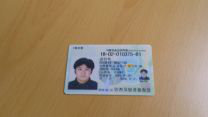

In [0]:
image

In [0]:
image_tensor = to_tensor(image)

In [0]:
image_tensors = image_tensor.unsqueeze(0).to(device)

In [0]:
from PIL import ImageDraw

In [0]:
draw_line = ImageDraw.Draw(image)

In [0]:
ANS_LT = [train_data['LTx'][test_index]*resize_ratio, train_data['LTy'][test_index]*resize_ratio]
ANS_RT = [train_data['RTx'][test_index]*resize_ratio, train_data['RTy'][test_index]*resize_ratio]
ANS_RB = [train_data['RBx'][test_index]*resize_ratio, train_data['RBy'][test_index]*resize_ratio]
ANS_LB = [train_data['LBx'][test_index]*resize_ratio, train_data['LBy'][test_index]*resize_ratio]

In [0]:
print(ANS_LT, ANS_RT, ANS_RB, ANS_LB)

[68.0, 44.0] [151.0, 44.0] [154.0, 95.0] [63.0, 94.0]


In [0]:
draw_line.point(ANS_LT, fill="Red" )
draw_line.point(ANS_RT, fill="Red" )
draw_line.point(ANS_RB, fill="Red" )
draw_line.point(ANS_LB, fill="Red" )

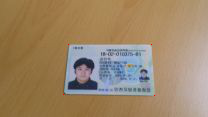

In [0]:
image

In [0]:
# do forward
result = model(image_tensors)

In [0]:
result = result.reshape(8)

In [0]:
PRE_LT = [result[0].item(), result[1].item()]
PRE_RT = [result[2].item(), result[3].item()]
PRE_RB = [result[4].item(), result[5].item()]
PRE_LB = [result[6].item(), result[7].item()]

In [0]:
print(PRE_LT, PRE_RT, PRE_RB, PRE_LB)

[67.62747192382812, 43.32123565673828] [150.64183044433594, 44.192134857177734] [154.26963806152344, 94.85943603515625] [62.12101745605469, 93.47274780273438]


In [0]:
draw_line.point(PRE_LT, fill="Yellow" )
draw_line.point(PRE_RT, fill="Yellow" )
draw_line.point(PRE_RB, fill="Yellow" )
draw_line.point(PRE_LB, fill="Yellow" )

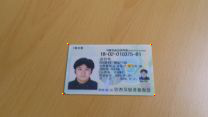

In [0]:
image

## Valid Image

In [0]:
valid_index = 1982

In [0]:
image = default_loader(data_root+valid_data['filename'][valid_index])

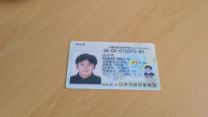

In [0]:
image

In [0]:
image_tensor = to_tensor(image)
image_tensors = image_tensor.unsqueeze(0).to(device)

from PIL import ImageDraw
draw_line = ImageDraw.Draw(image)

In [0]:
ANS_LT = [valid_data['LTx'][valid_index]*resize_ratio, valid_data['LTy'][valid_index]*resize_ratio]
ANS_RT = [valid_data['RTx'][valid_index]*resize_ratio, valid_data['RTy'][valid_index]*resize_ratio]
ANS_RB = [valid_data['RBx'][valid_index]*resize_ratio, valid_data['RBy'][valid_index]*resize_ratio]
ANS_LB = [valid_data['LBx'][valid_index]*resize_ratio, valid_data['LBy'][valid_index]*resize_ratio]

In [0]:
print(ANS_LT, ANS_RT, ANS_RB, ANS_LB)

[70.0, 40.0] [153.0, 43.0] [161.0, 89.0] [65.0, 88.0]


In [0]:
draw_line.point(ANS_LT, fill="Red" )
draw_line.point(ANS_RT, fill="Red" )
draw_line.point(ANS_RB, fill="Red" )
draw_line.point(ANS_LB, fill="Red" )

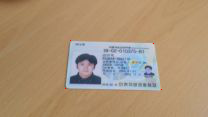

In [0]:
image

In [0]:
# do forward
result = model(image_tensors)

In [0]:
result = result.reshape(8)

In [0]:
PRE_LT = [result[0].item(), result[1].item()]
PRE_RT = [result[2].item(), result[3].item()]
PRE_RB = [result[4].item(), result[5].item()]
PRE_LB = [result[6].item(), result[7].item()]

print(PRE_LT, PRE_RT, PRE_RB, PRE_LB)

[68.5748291015625, 39.706661224365234] [153.54307556152344, 42.82640838623047] [160.29063415527344, 90.2564926147461] [65.01385498046875, 88.30014038085938]


In [0]:
draw_line.point(PRE_LT, fill="Yellow" )
draw_line.point(PRE_RT, fill="Yellow" )
draw_line.point(PRE_RB, fill="Yellow" )
draw_line.point(PRE_LB, fill="Yellow" )

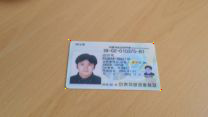

In [0]:
image

## Save High Error Image

In [0]:
def MSE(A, B):
  return np.square(np.subtract(A, B)).mean()

In [0]:
mkdir error_data

mkdir: cannot create directory ‘error_data’: File exists


In [0]:
from PIL import Image
from PIL import ImageDraw
import os

for valid_index in range(0, 3000):
  image = default_loader(data_root+valid_data['filename'][valid_index])
  
  image_tensor = to_tensor(image)
  image_tensors = image_tensor.unsqueeze(0).to(device)
  
  ANS_LT = [valid_data['LTx'][valid_index]*resize_ratio, valid_data['LTy'][valid_index]*resize_ratio]
  ANS_RT = [valid_data['RTx'][valid_index]*resize_ratio, valid_data['RTy'][valid_index]*resize_ratio]
  ANS_RB = [valid_data['RBx'][valid_index]*resize_ratio, valid_data['RBy'][valid_index]*resize_ratio]
  ANS_LB = [valid_data['LBx'][valid_index]*resize_ratio, valid_data['LBy'][valid_index]*resize_ratio]
  
  # print("Answer = [{:.1f}, {:.1f}], [{:.1f}, {:.1f}], [{:.1f}, {:.1f}], [{:.1f}, {:.1f}]".format(
  #    ANS_LT[0], ANS_LT[1], 
  #    ANS_RT[0], ANS_RT[1], 
  #    ANS_RB[0], ANS_RB[1], 
  #    ANS_LB[0], ANS_LB[1]))
  
  # do forward
  result = model(image_tensors)
  result = result.reshape(8)
  
  PRE_LT = [result[0].item(), result[1].item()]
  PRE_RT = [result[2].item(), result[3].item()]
  PRE_RB = [result[4].item(), result[5].item()]
  PRE_LB = [result[6].item(), result[7].item()]
  
  
  #print("Predct = [{:.1f}, {:.1f}], [{:.1f}, {:.1f}], [{:.1f}, {:.1f}], [{:.1f}, {:.1f}]".format(
  #    PRE_LT[0], PRE_LT[1], 
  #    PRE_RT[0], PRE_RT[1], 
  #    PRE_RB[0], PRE_RB[1], 
  #    PRE_LB[0], PRE_LB[1]))
  
  loss = MSE(ANS_LT, PRE_LT) + MSE(ANS_RT, PRE_RT) + MSE(ANS_RB, PRE_RB) + MSE(ANS_LB, PRE_LB)
  
  # print("Loss = ", loss)
  
  if loss > 10 :
    draw_line = ImageDraw.Draw(image)
    
    draw_line.point(ANS_LT, fill="Red" )
    draw_line.point(ANS_RT, fill="Red" )
    draw_line.point(ANS_RB, fill="Red" )
    draw_line.point(ANS_LB, fill="Red" )
    
    draw_line.point(PRE_LT, fill="Yellow" )
    draw_line.point(PRE_RT, fill="Yellow" )
    draw_line.point(PRE_RB, fill="Yellow" )
    draw_line.point(PRE_LB, fill="Yellow" )
    
    
    filename = valid_data['filename'][valid_index]
    filename = os.path.splitext(os.path.basename(filename))
    filename = "./error_data/{}_{:.0f}.JPG".format(filename[0], loss)
    # print(filename)
    
    image.save(filename, "JPEG")
    
  f = open("./error_image.txt",'a')
  context = "{}\t{:.6f}\n".format(valid_data['filename'][valid_index], loss)
  f.write(context)
  f.close()
  
  if valid_index % 100 == 0:
    print(valid_index)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [0]:
# rm error_image.txt
# rm -rd error_data

In [0]:
from google.colab import files
files.download('./error_image.txt')

In [0]:
import shutil
shutil.make_archive("error_images", 'zip', "./error_data/")

'/content/error_images.zip'

In [0]:
files.download('./error_images.zip')

## Other Image

In [0]:
# image = default_loader(data_root+"07_RandomShoot/20150429_161538.jpg")
image = default_loader(data_root+"07_RandomShoot/20150429_161434.jpg")

FileNotFoundError: ignored

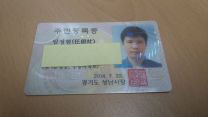

In [0]:
image

In [0]:
draw_line = ImageDraw.Draw(image)

In [0]:
# data_root+"07_RandomShoot/20150429_161434.jpg"
Answer = [754,	456, 3135,	413,	3458,	1846,	474,	1913]

# data_root+"07_RandomShoot/20150429_161538.jpg
# Answer = [934,	598,	3026,	569,	3273,	1609,	721,	1656]


ANS_LT = [ Answer[0]*resize_ratio, Answer[1]*resize_ratio ]
ANS_RT = [ Answer[2]*resize_ratio, Answer[3]*resize_ratio ]
ANS_RB = [ Answer[4]*resize_ratio, Answer[5]*resize_ratio ]
ANS_LB = [ Answer[6]*resize_ratio, Answer[7]*resize_ratio ]

In [0]:
print(ANS_LT, ANS_RT, ANS_RB, ANS_LB)

[37.7, 22.8] [156.75, 20.650000000000002] [172.9, 92.30000000000001] [23.700000000000003, 95.65]


In [0]:
draw_line.point(ANS_LT, fill="Red" )
draw_line.point(ANS_RT, fill="Red" )
draw_line.point(ANS_RB, fill="Red" )
draw_line.point(ANS_LB, fill="Red" )

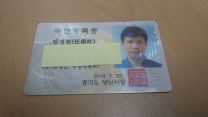

In [0]:
image

In [0]:
image_tensor = to_tensor(image)

In [0]:
image_tensors = image_tensor.unsqueeze(0).to(device)

In [0]:
# do forward
result = model(image_tensors)

In [0]:
result = result.reshape(8)

In [0]:
PRE_LT = [result[0].item(), result[1].item()]
PRE_RT = [result[2].item(), result[3].item()]
PRE_RB = [result[4].item(), result[5].item()]
PRE_LB = [result[6].item(), result[7].item()]

In [0]:
print(PRE_LT, PRE_RT, PRE_RB, PRE_LB)

[37.79604721069336, 13.183886528015137] [164.35345458984375, 20.255821228027344] [166.84228515625, 97.67449951171875] [25.857091903686523, 92.73535919189453]


In [0]:
draw_line.point(PRE_LT, fill="Yellow" )
draw_line.point(PRE_RT, fill="Yellow" )
draw_line.point(PRE_RB, fill="Yellow" )
draw_line.point(PRE_LB, fill="Yellow" )

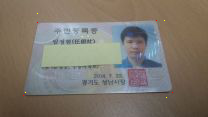

In [0]:
image

## 계획 관련

- 선정한 주제 :  운전면허증 인식
- 목표 : 나무색 배경의 [김민욱] 운전면허증 인식
- 중간발표일 : 2018-08-09
- 최종발표일 : 2018-08-30